- 데이터는 효준님의 도움을 받아 22.6 ~ 24.7 까지 서울, 인천, 대전, 광주, 대구, 부산, 울산의 데이터를 받아서 정리함.
- 
- 나의 목표는 24.8의 폭염예측
    - 일단은 대구 먼저
    - 22.8, 23.8 의 데이터에서 어떤 컬럼을 써야할까?
-
- 우선 처음으로 해야할 것은 모듈과 클래스 선언하고, 폰트 설정
- 데이터 불러오고 특별시와 광역시별로 데이터 프레임 만들기

In [2]:
# 모듈 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

In [3]:
# 경로 설정

# 파일
HW2208_path = './data/HW2208.csv'
HW2308_path = './data/HW2308.csv'

# 폰트
font_path = r'C:\Users\PC\Desktop\AI_빅데이터 전문가 양성과정 6기\KDT6\font\NanumMyeongjo.ttf'

In [4]:
# 폰트 설정

# 폰트 패밀리 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()

# 새로운 폰트 패밀리 이름 지정
rc('font',family=font_name)

In [5]:
# 데이터 프레임으로 만들기
HW2208_df = pd.read_csv(HW2208_path)
HW2308_df = pd.read_csv(HW2308_path)

In [6]:
# 효준님께서 만들어주신 함수

# 특정 지역의 데이터만 뽑아주는 함수
def make_city_df(df, city):
    # 지점 컬럼에서 지역명만 빼기
    list_data = []

    for i in df['지점']:
        list_data.append(i.split('(')[0])

    df['지점'] = list_data
    return df[df['지점'] == city]

# 데이터 프레임 합쳐주는 함수
def concat_data(city):
    data = pd.concat(
            [make_city_df(HW2208_df, city), 
             make_city_df(HW2308_df, city),], ignore_index = True)
    return data

In [7]:
# 데이터 불러오고 광역시별 기본 데이터프레임 만들기

seoul_df = concat_data('서울')
deagu_df = concat_data('대구')
deajeon_df = concat_data('대전')
gwangju_df = concat_data('광주')
ulsan_df = concat_data('울산')
incheon_df = concat_data('인천')
busan_df = concat_data('부산')

- 데이터는 다 불러왔음
- 
- 데이터 타입과 결측치, 이상치 확인
    - 먼저 대구만 확인할 예정

In [8]:
deagu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   일시          62 non-null     object 
 1   지점          62 non-null     object 
 2   폭염여부(O/X)   62 non-null     object 
 3   최고체감온도(°C)  62 non-null     float64
 4   최고기온(°C)    62 non-null     float64
 5   평균기온(°C)    62 non-null     float64
 6   최저기온(°C)    62 non-null     float64
 7   평균상대습도(%)   62 non-null     float64
 8   폭염특보(O/X)   62 non-null     object 
 9   폭염영향예보(단계)  62 non-null     object 
 10  열대야(O/X)    62 non-null     object 
 11  자외선지수(단계)   62 non-null     object 
dtypes: float64(5), object(7)
memory usage: 5.9+ KB


In [9]:
deagu_df.isna().sum()

일시            0
지점            0
폭염여부(O/X)     0
최고체감온도(°C)    0
최고기온(°C)      0
평균기온(°C)      0
최저기온(°C)      0
평균상대습도(%)     0
폭염특보(O/X)     0
폭염영향예보(단계)    0
열대야(O/X)      0
자외선지수(단계)     0
dtype: int64

In [10]:
deagu_df.head()

,일시,지점,폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%),폭염특보(O/X),폭염영향예보(단계),열대야(O/X),자외선지수(단계)
0,2022.8.1,대구,X,32.4,31.2,29.4,26.8,76.6,O,관심,O,보통
1,2022.8.2,대구,O,34.0,32.6,27.9,25.7,91.8,O,주의,O,높음
2,2022.8.3,대구,O,36.6,37.1,30.6,26.3,78.8,O,경고,O,매우높음
3,2022.8.4,대구,O,35.5,35.3,30.7,27.4,75.9,O,경고,O,보통
4,2022.8.5,대구,O,35.6,35.2,30.8,26.5,75.0,O,경고,O,높음


In [11]:
deagu_df.describe(include='all')    # 진짜 깨끗하넹...

,일시,지점,폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%),폭염특보(O/X),폭염영향예보(단계),열대야(O/X),자외선지수(단계)
count,62,62,62,62.000000,62.000000,62.000000,62.000000,62.000000,62,62,62,62
unique,62,1,2,NaN,NaN,NaN,NaN,NaN,2,4,2,4
top,2022.8.1,대구,X,NaN,NaN,NaN,NaN,NaN,O,경고,X,높음
freq,1,62,35,NaN,NaN,NaN,NaN,NaN,44,24,39,19
mean,NaN,NaN,NaN,32.045161,31.624194,27.193548,23.667742,78.129032,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,2.940819,3.684246,2.780074,2.595568,9.481533,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,25.000000,22.600000,20.900000,16.200000,62.100000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,30.600000,28.950000,25.550000,22.350000,71.050000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,32.000000,32.450000,27.150000,23.900000,76.250000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,34.225000,34.450000,29.650000,25.650000,84.675000,NaN,NaN,NaN,NaN


In [12]:
# 다른 도시들도 보자
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   일시          62 non-null     object 
 1   지점          62 non-null     object 
 2   폭염여부(O/X)   62 non-null     object 
 3   최고체감온도(°C)  62 non-null     float64
 4   최고기온(°C)    62 non-null     float64
 5   평균기온(°C)    62 non-null     float64
 6   최저기온(°C)    61 non-null     float64
 7   평균상대습도(%)   62 non-null     float64
 8   폭염특보(O/X)   62 non-null     object 
 9   폭염영향예보(단계)  62 non-null     object 
 10  열대야(O/X)    62 non-null     object 
 11  자외선지수(단계)   62 non-null     object 
dtypes: float64(5), object(7)
memory usage: 5.9+ KB


In [13]:
seoul_df.isna().sum()

일시            0
지점            0
폭염여부(O/X)     0
최고체감온도(°C)    0
최고기온(°C)      0
평균기온(°C)      0
최저기온(°C)      1
평균상대습도(%)     0
폭염특보(O/X)     0
폭염영향예보(단계)    0
열대야(O/X)      0
자외선지수(단계)     0
dtype: int64

In [14]:
seoul_df.head()

,일시,지점,폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%),폭염특보(O/X),폭염영향예보(단계),열대야(O/X),자외선지수(단계)
0,2022.8.1,서울,O,33.8,32.4,28.6,25.4,82.4,X,관심,O,높음
1,2022.8.2,서울,X,30.6,28.5,26.8,25.5,90.0,X,관심,O,높음
2,2022.8.3,서울,X,32.0,30.0,27.1,25.2,90.1,X,관심,O,보통
3,2022.8.4,서울,O,33.9,32.9,28.9,26.0,79.3,O,관심,O,높음
4,2022.8.5,서울,O,33.6,32.7,29.4,27.0,76.6,O,주의,O,높음


In [15]:
deajeon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   일시          62 non-null     object 
 1   지점          62 non-null     object 
 2   폭염여부(O/X)   62 non-null     object 
 3   최고체감온도(°C)  62 non-null     float64
 4   최고기온(°C)    62 non-null     float64
 5   평균기온(°C)    62 non-null     float64
 6   최저기온(°C)    62 non-null     float64
 7   평균상대습도(%)   62 non-null     float64
 8   폭염특보(O/X)   62 non-null     object 
 9   폭염영향예보(단계)  62 non-null     object 
 10  열대야(O/X)    62 non-null     object 
 11  자외선지수(단계)   62 non-null     object 
dtypes: float64(5), object(7)
memory usage: 5.9+ KB


In [16]:
deajeon_df.head()

,일시,지점,폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%),폭염특보(O/X),폭염영향예보(단계),열대야(O/X),자외선지수(단계)
0,2022.8.1,대전,O,33.4,32.3,27.6,24.6,82.0,O,관심,O,보통
1,2022.8.2,대전,X,32.6,31.7,27.9,25.4,78.9,O,주의,O,높음
2,2022.8.3,대전,O,33.8,33.4,29.3,26.5,72.8,O,주의,O,높음
3,2022.8.4,대전,O,34.3,34.1,29.2,25.5,74.5,O,주의,O,높음
4,2022.8.5,대전,O,34.0,33.3,28.7,25.7,78.1,O,주의,O,보통


In [17]:
deajeon_df.isna().sum()

일시            0
지점            0
폭염여부(O/X)     0
최고체감온도(°C)    0
최고기온(°C)      0
평균기온(°C)      0
최저기온(°C)      0
평균상대습도(%)     0
폭염특보(O/X)     0
폭염영향예보(단계)    0
열대야(O/X)      0
자외선지수(단계)     0
dtype: int64

In [18]:
gwangju_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   일시          62 non-null     object 
 1   지점          62 non-null     object 
 2   폭염여부(O/X)   62 non-null     object 
 3   최고체감온도(°C)  62 non-null     float64
 4   최고기온(°C)    62 non-null     float64
 5   평균기온(°C)    62 non-null     float64
 6   최저기온(°C)    62 non-null     float64
 7   평균상대습도(%)   62 non-null     float64
 8   폭염특보(O/X)   62 non-null     object 
 9   폭염영향예보(단계)  62 non-null     object 
 10  열대야(O/X)    62 non-null     object 
 11  자외선지수(단계)   62 non-null     object 
dtypes: float64(5), object(7)
memory usage: 5.9+ KB


In [19]:
gwangju_df.head()

,일시,지점,폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%),폭염특보(O/X),폭염영향예보(단계),열대야(O/X),자외선지수(단계)
0,2022.8.1,광주,O,33.1,30.0,27.6,25.5,98.4,O,관심,O,높음
1,2022.8.2,광주,O,34.0,31.4,28.0,25.4,95.3,O,주의,O,높음
2,2022.8.3,광주,O,34.8,31.4,27.9,25.6,97.3,O,주의,O,매우높음
3,2022.8.4,광주,O,35.1,33.3,29.0,26.3,90.6,O,경고,O,높음
4,2022.8.5,광주,O,35.0,32.5,29.0,26.6,93.3,O,경고,O,보통


In [20]:
gwangju_df.isna().sum()

일시            0
지점            0
폭염여부(O/X)     0
최고체감온도(°C)    0
최고기온(°C)      0
평균기온(°C)      0
최저기온(°C)      0
평균상대습도(%)     0
폭염특보(O/X)     0
폭염영향예보(단계)    0
열대야(O/X)      0
자외선지수(단계)     0
dtype: int64

In [21]:
incheon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   일시          62 non-null     object 
 1   지점          62 non-null     object 
 2   폭염여부(O/X)   62 non-null     object 
 3   최고체감온도(°C)  62 non-null     float64
 4   최고기온(°C)    62 non-null     float64
 5   평균기온(°C)    62 non-null     float64
 6   최저기온(°C)    62 non-null     float64
 7   평균상대습도(%)   62 non-null     float64
 8   폭염특보(O/X)   62 non-null     object 
 9   폭염영향예보(단계)  62 non-null     object 
 10  열대야(O/X)    62 non-null     object 
 11  자외선지수(단계)   62 non-null     object 
dtypes: float64(5), object(7)
memory usage: 5.9+ KB


In [22]:
incheon_df.head()

,일시,지점,폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%),폭염특보(O/X),폭염영향예보(단계),열대야(O/X),자외선지수(단계)
0,2022.8.1,인천,X,32.8,31.3,27.7,24.9,85.0,X,관심,O,높음
1,2022.8.2,인천,X,29.2,26.3,25.5,24.5,95.8,X,관심,X,매우높음
2,2022.8.3,인천,X,31.0,28.1,26.3,24.7,94.6,X,관심,O,매우높음
3,2022.8.4,인천,X,32.0,30.0,27.3,25.3,88.1,O,관심,O,매우높음
4,2022.8.5,인천,X,32.1,30.0,27.8,26.3,87.0,O,주의,O,매우높음


In [23]:
incheon_df.isna().sum()

일시            0
지점            0
폭염여부(O/X)     0
최고체감온도(°C)    0
최고기온(°C)      0
평균기온(°C)      0
최저기온(°C)      0
평균상대습도(%)     0
폭염특보(O/X)     0
폭염영향예보(단계)    0
열대야(O/X)      0
자외선지수(단계)     0
dtype: int64

In [24]:
busan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   일시          62 non-null     object 
 1   지점          62 non-null     object 
 2   폭염여부(O/X)   62 non-null     object 
 3   최고체감온도(°C)  62 non-null     float64
 4   최고기온(°C)    62 non-null     float64
 5   평균기온(°C)    62 non-null     float64
 6   최저기온(°C)    62 non-null     float64
 7   평균상대습도(%)   62 non-null     float64
 8   폭염특보(O/X)   62 non-null     object 
 9   폭염영향예보(단계)  62 non-null     object 
 10  열대야(O/X)    62 non-null     object 
 11  자외선지수(단계)   62 non-null     object 
dtypes: float64(5), object(7)
memory usage: 5.9+ KB


In [25]:
busan_df.head()

,일시,지점,폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%),폭염특보(O/X),폭염영향예보(단계),열대야(O/X),자외선지수(단계)
0,2022.8.1,부산,X,32.3,30.5,27.5,26.2,87.4,O,관심,O,높음
1,2022.8.2,부산,X,31.8,29.4,27.1,26.0,93.4,O,주의,O,높음
2,2022.8.3,부산,X,32.5,30.4,27.7,25.4,88.1,O,주의,O,매우높음
3,2022.8.4,부산,O,33.2,31.8,28.7,26.2,83.1,O,주의,O,매우높음
4,2022.8.5,부산,O,34.2,33.1,29.0,26.6,81.6,O,주의,O,매우높음


In [26]:
busan_df.isna().sum()

일시            0
지점            0
폭염여부(O/X)     0
최고체감온도(°C)    0
최고기온(°C)      0
평균기온(°C)      0
최저기온(°C)      0
평균상대습도(%)     0
폭염특보(O/X)     0
폭염영향예보(단계)    0
열대야(O/X)      0
자외선지수(단계)     0
dtype: int64

In [27]:
ulsan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   일시          62 non-null     object 
 1   지점          62 non-null     object 
 2   폭염여부(O/X)   62 non-null     object 
 3   최고체감온도(°C)  62 non-null     float64
 4   최고기온(°C)    62 non-null     float64
 5   평균기온(°C)    62 non-null     float64
 6   최저기온(°C)    62 non-null     float64
 7   평균상대습도(%)   62 non-null     float64
 8   폭염특보(O/X)   62 non-null     object 
 9   폭염영향예보(단계)  62 non-null     object 
 10  열대야(O/X)    62 non-null     object 
 11  자외선지수(단계)   62 non-null     object 
dtypes: float64(5), object(7)
memory usage: 5.9+ KB


In [28]:
ulsan_df.head()

,일시,지점,폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%),폭염특보(O/X),폭염영향예보(단계),열대야(O/X),자외선지수(단계)
0,2022.8.1,울산,X,32.4,30.7,28.4,26.6,83.1,X,관심,O,높음
1,2022.8.2,울산,X,32.3,30.4,28.4,26.8,82.6,O,관심,O,보통
2,2022.8.3,울산,O,34.2,34.0,29.4,26.0,76.8,O,주의,O,매우높음
3,2022.8.4,울산,O,33.9,34.1,30.0,26.2,71.6,O,주의,O,매우높음
4,2022.8.5,울산,O,34.1,34.0,29.8,25.8,74.8,O,경고,O,매우높음


In [29]:
ulsan_df.isna().sum()

일시            0
지점            0
폭염여부(O/X)     0
최고체감온도(°C)    0
최고기온(°C)      0
평균기온(°C)      0
최저기온(°C)      0
평균상대습도(%)     0
폭염특보(O/X)     0
폭염영향예보(단계)    0
열대야(O/X)      0
자외선지수(단계)     0
dtype: int64

- 서울 최저기온 칼럼만 결측치 하나

In [30]:
seoul_df[seoul_df['최저기온(°C)'].isna() == True]

,일시,지점,폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%),폭염특보(O/X),폭염영향예보(단계),열대야(O/X),자외선지수(단계)
7,2022.8.8,서울,X,30.9,28.4,26.8,NaN,91.6,X,주의,O,보통


In [31]:
seoul_df.head(10)

,일시,지점,폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%),폭염특보(O/X),폭염영향예보(단계),열대야(O/X),자외선지수(단계)
0,2022.8.1,서울,O,33.8,32.4,28.6,25.4,82.4,X,관심,O,높음
1,2022.8.2,서울,X,30.6,28.5,26.8,25.5,90.0,X,관심,O,높음
2,2022.8.3,서울,X,32.0,30.0,27.1,25.2,90.1,X,관심,O,보통
3,2022.8.4,서울,O,33.9,32.9,28.9,26.0,79.3,O,관심,O,높음
4,2022.8.5,서울,O,33.6,32.7,29.4,27.0,76.6,O,주의,O,높음
5,2022.8.6,서울,X,32.5,30.3,28.7,27.4,85.3,O,주의,O,보통
6,2022.8.7,서울,O,33.4,31.7,28.9,27.2,82.1,O,주의,O,보통
7,2022.8.8,서울,X,30.9,28.4,26.8,NaN,91.6,X,주의,O,보통
8,2022.8.9,서울,X,29.6,26.5,25.1,22.0,96.0,X,,X,보통
9,2022.8.10,서울,X,30.1,28.8,24.7,21.4,85.3,X,,X,보통


In [49]:
# 서울 최저기온의 결측치는 열대야를 기준으로 평균치로 채워 넣음.
idx = seoul_df[seoul_df['최저기온(°C)'].isna() == True].index   # 리스트로 나옴. for문으로 처리

tropical_night = seoul_df[seoul_df['열대야(O/X)'] == 'O']['최저기온(°C)'].mean()
non_tropical_night = seoul_df[seoul_df['열대야(O/X)'] == 'X']['최저기온(°C)'].mean()

for i in range(len(idx)):
    if seoul_df.loc[idx[i], '열대야(O/X)'] == 'O':
        seoul_df['최저기온(°C)'] = seoul_df['최저기온(°C)'].fillna(tropical_night)
    else:
        seoul_df['최저기온(°C)'] = seoul_df['최저기온(°C)'].fillna(non_tropical_night)


seoul_df['최저기온(°C)'].isna().sum()    


np.int64(0)

- 결측치는 열대야 유무를 기준으로 평균치를 채워줌.
- 폭염영향예보(단계)의 경우에는 결측치는 없었지만 공백 문자로 채워져있었음.
- 기상청에서 4단계로 폭염영향예보를 함. 그 기준을 따르면 공백문자는 결측치가 아니라 의도된 값임을 알 수 있음.
    - 즉, 공백인 날에는 폭염예보가 그 어떤 것도 없는 날임.

In [50]:
seoul_df['폭염영향예보(단계)'].value_counts()

폭염영향예보(단계)
      19
주의    18
관심    16
경고     9
Name: count, dtype: int64

In [51]:
seoul_df['폭염영향예보(단계)'].unique()

array(['관심', '주의', ' ', '경고'], dtype=object)

- 대구의 22.8, 23.8의 데이터 정제
    - '일시' 칼럼을 행으로 하는 것보다는 범주화 하는 것이 나을 것으로 보임.
    - 나눈다면 ['2022.8.1~10', '2022.8.11~20', '22.8.21~31', '2023.8.1~10', '2023.8.11~20', '2023.8.21~31']
    - bins인가 bin으로 나눈다면 가능하지 않을까? 리스트로 첫번째만 지정해주면 알아서 잘라주려나?
- 
    - 만약에 하다가 필요하다면 '폭염여부(O/X)', '폭염영향예보(단계)', '열대야(O/X)'의 값들을 바꿔야지 했는데 그냥 저냥 저걸로 뭘 할건 아니고 한다고 해도 sum이랑 count 쓰면 웬만한 비율은 계산 이 가능하니까.
    - 
    - 필요한 칼럼 : '일시', '폭염여부(O/X)', '최고체감온도(°C)', '최고기온(°C)', '평균기온(°C)', '최저기온(°C)', '폭염영향예보(단계)', '열대야(O/X)'
    - 
    - 
    - 31일은 버려야 할까? 이거 차차 고민해보자.

In [95]:
# 필요한 칼럼만 뽑아오자
deagu_df_1 = deagu_df[['일시', '폭염여부(O/X)', '최고체감온도(°C)', '최고기온(°C)', '평균기온(°C)', '최저기온(°C)', '폭염영향예보(단계)', '열대야(O/X)']]
deagu_df_1.head(2)

,일시,폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),폭염영향예보(단계),열대야(O/X)
0,2022.8.1,X,32.4,31.2,29.4,26.8,관심,O
1,2022.8.2,O,34.0,32.6,27.9,25.7,주의,O


In [104]:
date_range_label = ['2022.8.1', '2022.8.11', '2022.8.21', '2023.8.1', '2023.8.11', '2023.8.21']
date_range = [10, 10, 11, 10, 10, 11]

# pd.cut을 쓰고 싶은데 안되니까 짜증나서 하드코딩함.
deagu_df_1.loc[:,'date_range'] = 0
deagu_df_1['date_range'] = deagu_df_1['date_range'].replace(0, pd.NA)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9856\1028912829.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deagu_df_1['date_range'] = deagu_df_1['date_range'].replace(0, pd.NA)


In [105]:
deagu_df_1.loc[0,'date_range'] = '2022.08.01 ~ 10'
deagu_df_1.loc[10, 'date_range'] = '2022.08.11 ~ 20'
deagu_df_1.loc[20, 'date_range'] = '2022.08.21 ~ 31'
deagu_df_1.loc[31, 'date_range'] = '2023.08.01 ~ 10'
deagu_df_1.loc[41, 'date_range'] = '2023.08.11 ~ 20'
deagu_df_1.loc[51, 'date_range'] = '2023.08.21 ~ 31'

In [106]:
deagu_df_1['date_range'].isna().sum()

np.int64(56)

In [109]:
deagu_df_1['date_range'] = deagu_df_1['date_range'].ffill()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9856\1831136751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deagu_df_1['date_range'] = deagu_df_1['date_range'].ffill()


In [110]:
deagu_df_1

,일시,폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),폭염영향예보(단계),열대야(O/X),date_range
0,2022.8.1,X,32.4,31.2,29.4,26.8,관심,O,2022.08.01 ~ 10
1,2022.8.2,O,34.0,32.6,27.9,25.7,주의,O,2022.08.01 ~ 10
2,2022.8.3,O,36.6,37.1,30.6,26.3,경고,O,2022.08.01 ~ 10
3,2022.8.4,O,35.5,35.3,30.7,27.4,경고,O,2022.08.01 ~ 10
4,2022.8.5,O,35.6,35.2,30.8,26.5,경고,O,2022.08.01 ~ 10
...,...,...,...,...,...,...,...,...,...
57,2023.8.27,X,30.9,30.9,25.5,22.3,주의,X,2023.08.21 ~ 31
58,2023.8.28,X,29.5,27.9,25.5,23.0,주의,X,2023.08.21 ~ 31
59,2023.8.29,X,29.9,28.0,25.7,23.2,주의,X,2023.08.21 ~ 31
60,2023.8.30,X,28.7,25.9,24.7,22.3,,X,2023.08.21 ~ 31


In [119]:
deagu_date_df = deagu_df_1.set_index(['date_range', '일시'])

In [120]:
deagu_date_df

폭염여부(O/X)  최고체감온도(°C)  최고기온(°C)  평균기온(°C)  최저기온(°C)  \
date_range      일시                                                              
2022.08.01 ~ 10 2022.8.1          X        32.4      31.2      29.4      26.8   
                2022.8.2          O        34.0      32.6      27.9      25.7   
                2022.8.3          O        36.6      37.1      30.6      26.3   
                2022.8.4          O        35.5      35.3      30.7      27.4   
                2022.8.5          O        35.6      35.2      30.8      26.5   
...                             ...         ...       ...       ...       ...   
2023.08.21 ~ 31 2023.8.27         X        30.9      30.9      25.5      22.3   
                2023.8.28         X        29.5      27.9      25.5      23.0   
                2023.8.29         X        29.9      28.0      25.7      23.2   
                2023.8.30         X        28.7      25.9      24.7      22.3   
                2023.8.31         X        27.6      25.7      23.3      21.2   

                          폭염영향예보(단계) 열대야(O/X)  
date_range      일시                             
2022.08.01 ~ 10 2022.8.1          관심        O  
                2022.8.2          주의        O  
                2022.8.3          경고        O  
                2022.8.4          경고        O  
                2022.8.5          경고        O  
...                              ...      ...  
2023.08.21 ~ 31 2023.8.27         주의        X  
                2023.8.28         주의        X  
                2023.8.29         주의        X  
                2023.8.30                   X  
                2023.8.31                   X  

[62 rows x 7 columns]

In [134]:
deagu_date_df.loc['2023.08.21 ~ 31']['최고기온(°C)']    # 와.. subplot 으로 그리면 되겠다.

일시
2023.8.21    33.7
2023.8.22    34.0
2023.8.23    34.0
2023.8.24    29.4
2023.8.25    32.4
2023.8.26    32.8
2023.8.27    30.9
2023.8.28    27.9
2023.8.29    28.0
2023.8.30    25.9
2023.8.31    25.7
Name: 최고기온(°C), dtype: float64

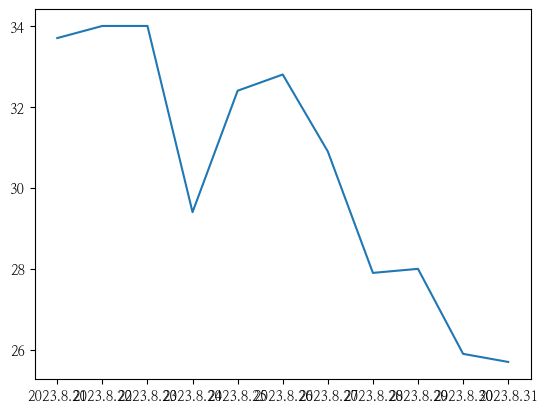

In [135]:
plt.plot(deagu_date_df.loc['2023.08.21 ~ 31']['최고기온(°C)'])
plt.show()

- subplot으로 그림을 그려서 분석을 해보자!

In [136]:
deagu_date_df.columns

Index(['폭염여부(O/X)', '최고체감온도(°C)', '최고기온(°C)', '평균기온(°C)', '최저기온(°C)',
       '폭염영향예보(단계)', '열대야(O/X)'],
      dtype='object')

In [162]:
deagu_date_df.loc['2022.08.01 ~ 10'].index

Index(['2022.8.1', '2022.8.2', '2022.8.3', '2022.8.4', '2022.8.5', '2022.8.6',
       '2022.8.7', '2022.8.8', '2022.8.9', '2022.8.10'],
      dtype='object', name='일시')

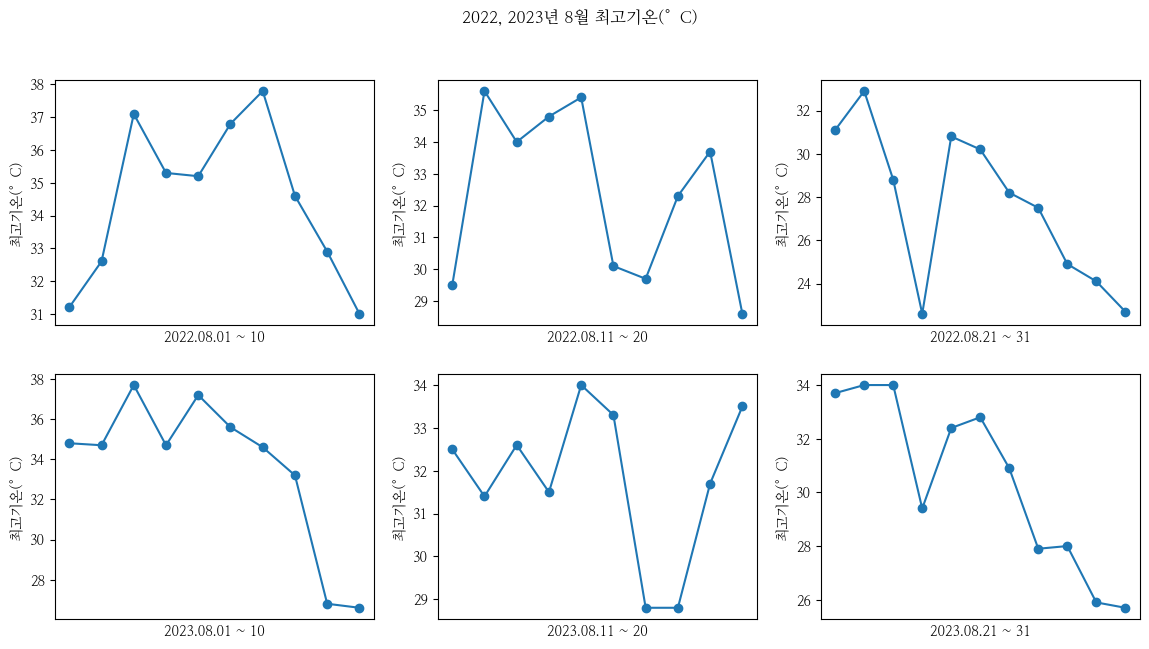

In [205]:
# subplot을 그리자
label = ['최고체감온도(°C)', '최고기온(°C)', '평균기온(°C)', '최저기온(°C)']
range_label = ['2022.08.01 ~ 10', '2022.08.11 ~ 20', '2022.08.21 ~ 31',
               '2023.08.01 ~ 10', '2023.08.11 ~ 20', '2023.08.21 ~ 31']

# deagu_date_df.loc['2022.08.01 ~ 10'].index

fig = plt.figure(figsize=[14,7])

axes = fig.subplots(2, 3)
for row in range(2):
    for col in range(3):
        row_name = range_label[row*3 + col]
        axes[row, col].plot(deagu_date_df.loc[row_name].index,deagu_date_df.loc[row_name]['최고기온(°C)'], 'o-')
        
        axes[row, col].set_xlabel(row_name)
        axes[row, col].set_ylabel('최고기온(°C)')
        axes[row, col].set_xticks([])
fig.suptitle('2022, 2023년 8월 최고기온(°C)')
plt.show()

In [339]:
def draw_temp(range_label_, label_, data_, show_data):
    fig = plt.figure(figsize=[15,7])
    axes = fig.subplots(2, 3)
    
    for row in range(2):
        for col in range(3):
            for i in range(len(label_)):
                row_name = range_label_[row*3 + col]
                axes[row, col].plot(show_data.loc[row_name].index, show_data.loc[row_name][label_[i]], 'o-', label=label_[i])
                
                axes[row, col].set_xlabel(row_name)
                axes[row, col].set_ylabel('기온(°C)')
                axes[row, col].set_xticks([])
    
    fig.suptitle(f'2022, 2023년도 8월 {data_.loc[0, "지점"]} 온도(°C)')
    axes[0,2].legend(loc='upper right', ncol=2, fontsize='x-small')
    # fig.suptitle('2022, 2023년 8월 최고기온(°C)')
    plt.show()

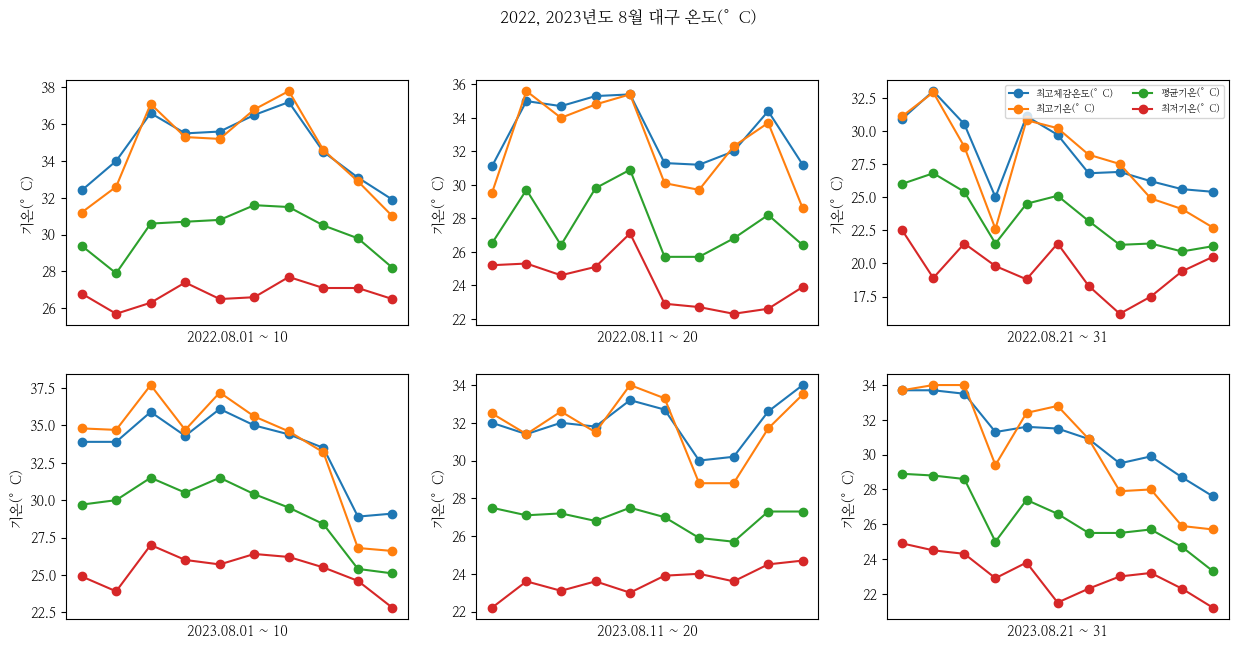

In [340]:
label = ['최고체감온도(°C)', '최고기온(°C)', '평균기온(°C)', '최저기온(°C)']
range_label = ['2022.08.01 ~ 10', '2022.08.11 ~ 20', '2022.08.21 ~ 31',
               '2023.08.01 ~ 10', '2023.08.11 ~ 20', '2023.08.21 ~ 31']

draw_temp(range_label, label, deagu_df, deagu_date_df)

In [198]:
(deagu_date_df.loc['2022.08.01 ~ 10']['폭염여부(O/X)'] == 'O').sum()

np.int64(8)

In [243]:
deagu_date_df.loc['2022.08.01 ~ 10']['폭염여부(O/X)'].unique()[0]

'X'

In [242]:
deagu_date_df.loc['2022.08.01 ~ 10']['폭염여부(O/X)'].value_counts()

폭염여부(O/X)
O    8
X    2
Name: count, dtype: int64

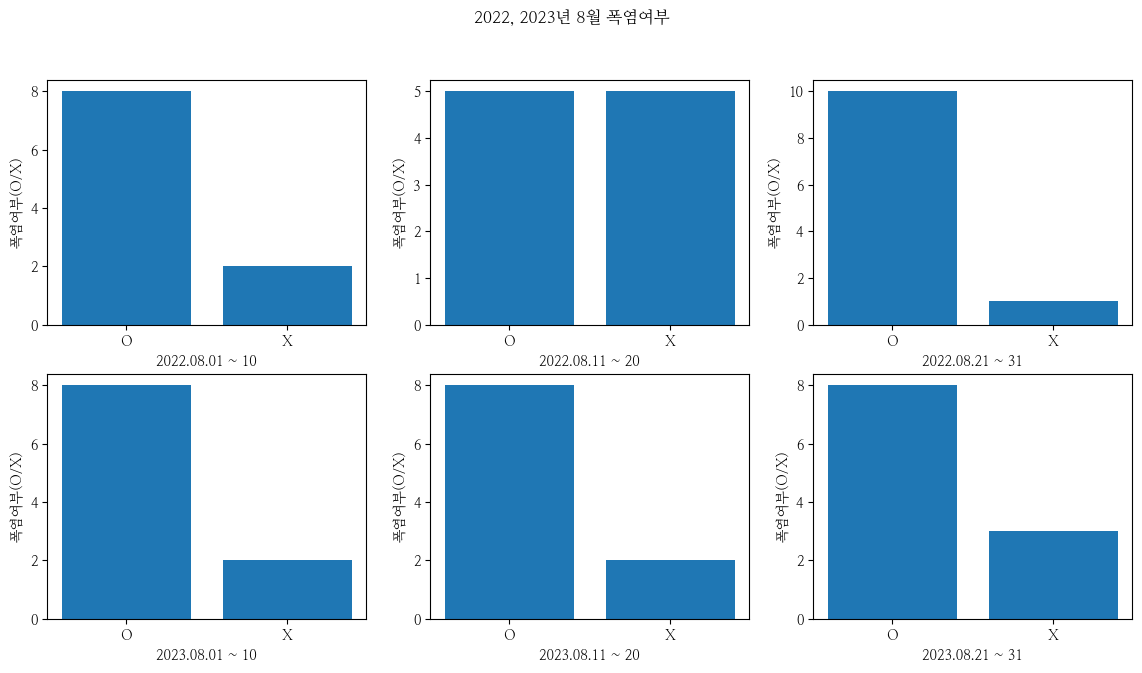

In [258]:
# 폭염과 열대야 유무 바 그래프
# subplot을 그리자
label = ['폭염여부(O/X)', '열대야(O/X)', '폭염영향예보(단계)']
range_label = ['2022.08.01 ~ 10', '2022.08.11 ~ 20', '2022.08.21 ~ 31',
               '2023.08.01 ~ 10', '2023.08.11 ~ 20', '2023.08.21 ~ 31']

fig = plt.figure(figsize=[14,7])

axes = fig.subplots(2, 3)
for row in range(2):
    for col in range(3):
        row_name = range_label[row*3 + col]
        axes[row, col].bar([deagu_date_df.loc[row_name]['폭염여부(O/X)'].unique()[0], deagu_date_df.loc[row_name]['폭염여부(O/X)'].unique()[1]],
                            deagu_date_df.loc[row_name]['폭염여부(O/X)'].value_counts())
        
        axes[row, col].set_xlabel(row_name)
        axes[row, col].set_ylabel('폭염여부(O/X)')
        axes[row, col].set_xticks(np.arange(0, 2, 1), ['O', 'X'])
fig.suptitle('2022, 2023년 8월 폭염여부')
plt.show()

In [278]:
deagu_date_df.loc['2022.08.01 ~ 10']['폭염여부(O/X)'].value_counts()

폭염여부(O/X)
O    8
X    2
Name: count, dtype: int64

In [315]:
# 함수로 나타내면
def draw_TF(range_label_, label_, data_, show_data):
    
    fig = plt.figure(figsize=[14,7])
    width = 0.25
    categories = ['O', 'X']
    x = np.arange(len(categories))
    
    axes = fig.subplots(2, 3)
    for row in range(2):
        for col in range(3):
            row_name = range_label_[row*3 + col]
            for i , _ in enumerate(label_):
                offset = width * i
                count = show_data.loc[row_name][_].value_counts().reindex(categories, fill_value=0)
                axes[row, col].bar(x+offset, count, width, label=_)
                
                axes[row, col].set_xlabel(row_name)
                axes[row, col].set_ylabel('일수')
            axes[row, col].set_xticks(x+width, categories)
    fig.suptitle(f'2022, 2023년 8월 {data_.loc[0,"지점"]} 폭염여부')
    axes[0,2].legend(loc='upper right', ncol=2, fontsize='small')
    plt.show()

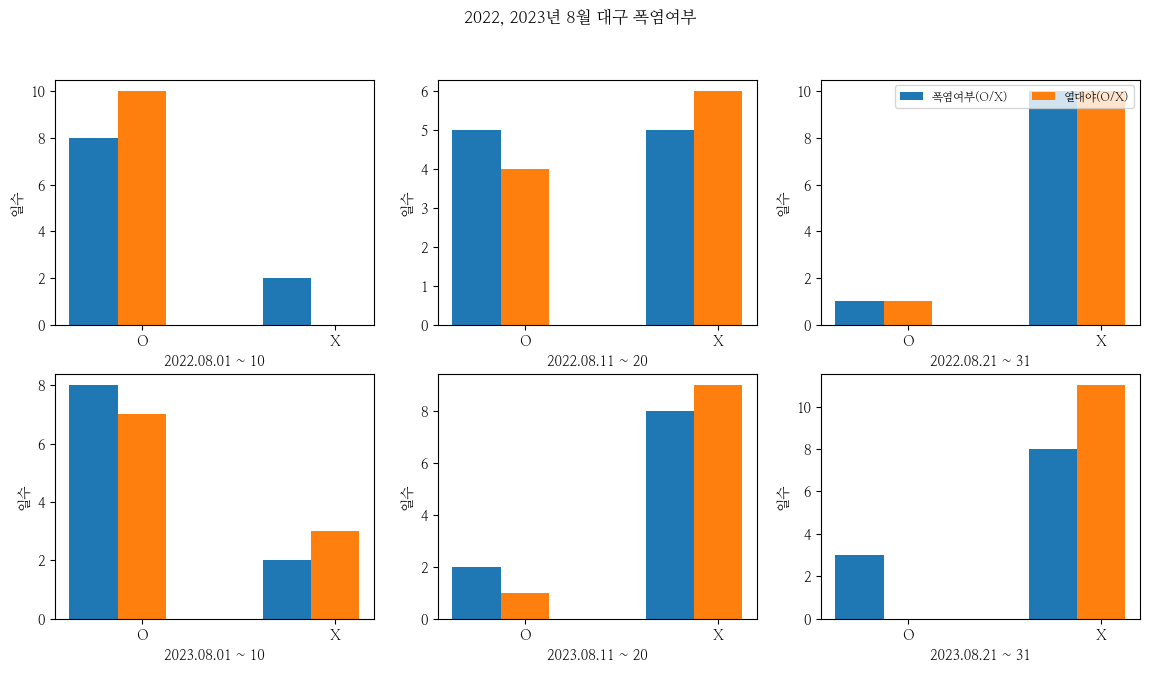

In [316]:
# 폭염과 열대야 유무 바 그래프
# subplot을 그리자
label = ['폭염여부(O/X)', '열대야(O/X)']
range_label = ['2022.08.01 ~ 10', '2022.08.11 ~ 20', '2022.08.21 ~ 31',
               '2023.08.01 ~ 10', '2023.08.11 ~ 20', '2023.08.21 ~ 31']

draw_TF(range_label, label, deagu_df, deagu_date_df)

In [333]:
# subplot을 그리자
def draw_hot_step(range_label_, data_, show_data):
    fig = plt.figure(figsize=[14,7])
    categories = [' ', '주의', '관심', '경고']
    x = np.arange(len(categories))

    axes = fig.subplots(2, 3)
    for row in range(2):
        for col in range(3):
            row_name = range_label_[row*3 + col]
            count = show_data.loc[row_name]['폭염영향예보(단계)'].value_counts().reindex(categories, fill_value=0)
            axes[row, col].bar(x, count)
            
            axes[row, col].set_xlabel(row_name)
            axes[row, col].set_ylabel('일수')
            axes[row, col].set_xticks(np.arange(0, 4, 1), categories)
    fig.suptitle(f'2022, 2023년 8월 {data_.loc[0, "지점"]} 폭염영향예보')
    plt.show()

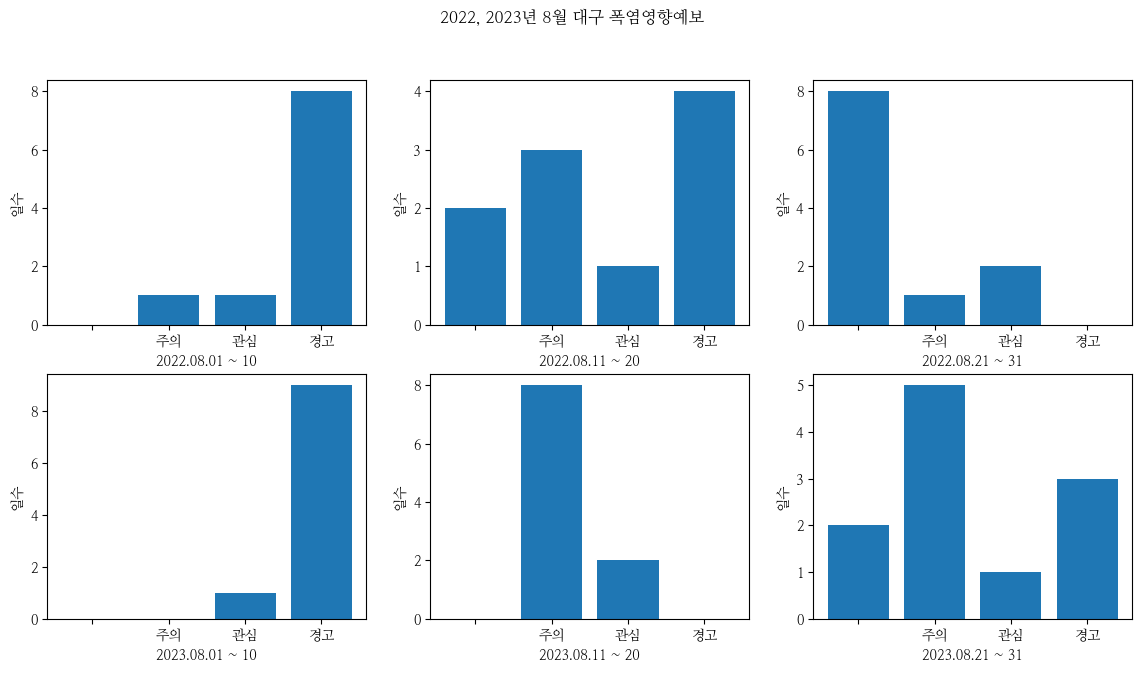

In [334]:
label = '폭염영향예보(단계)'
range_label = ['2022.08.01 ~ 10', '2022.08.11 ~ 20', '2022.08.21 ~ 31',
               '2023.08.01 ~ 10', '2023.08.11 ~ 20', '2023.08.21 ~ 31']

draw_hot_step(range_label, deagu_df, deagu_date_df)

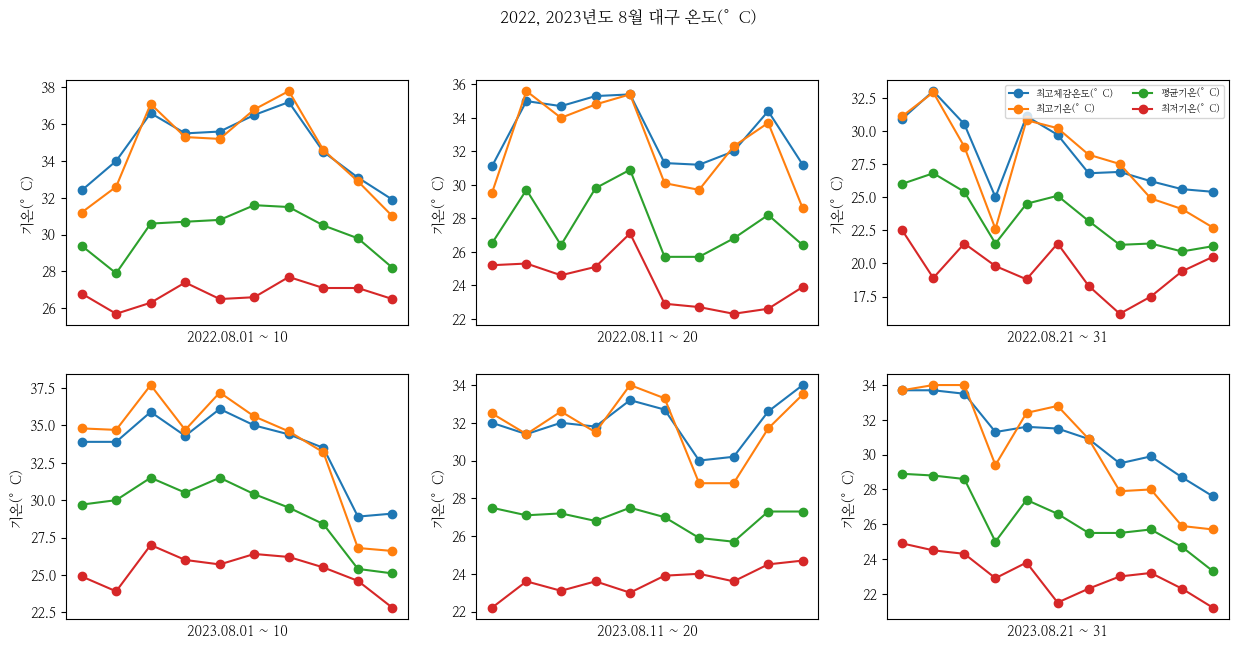

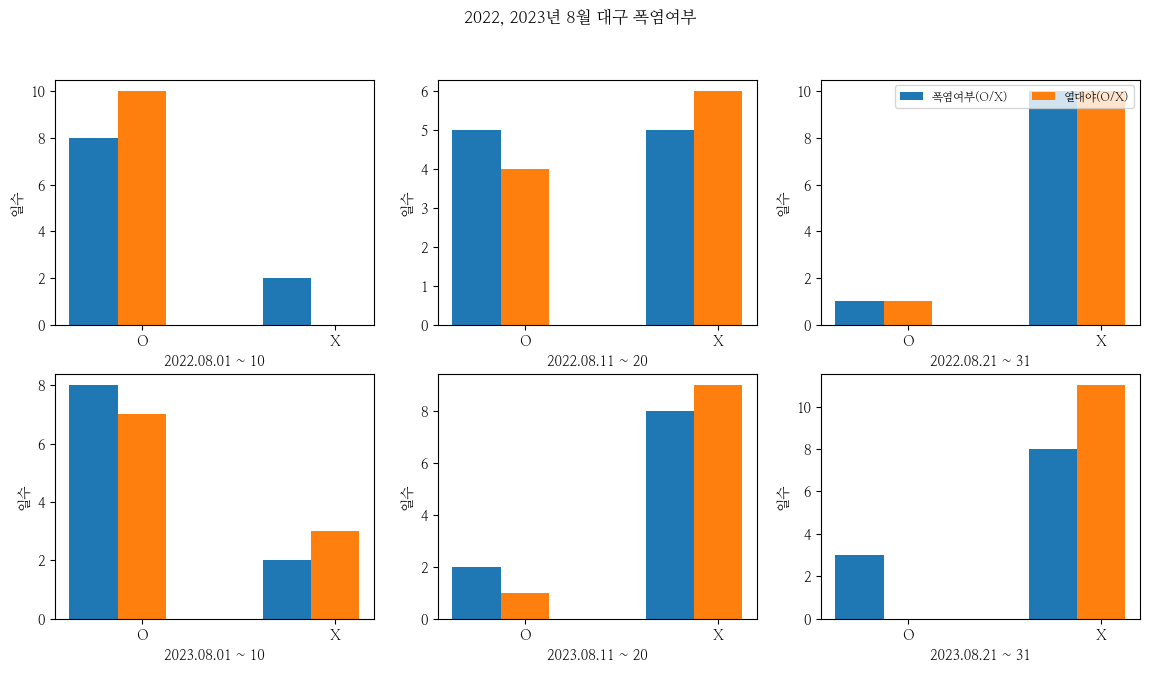

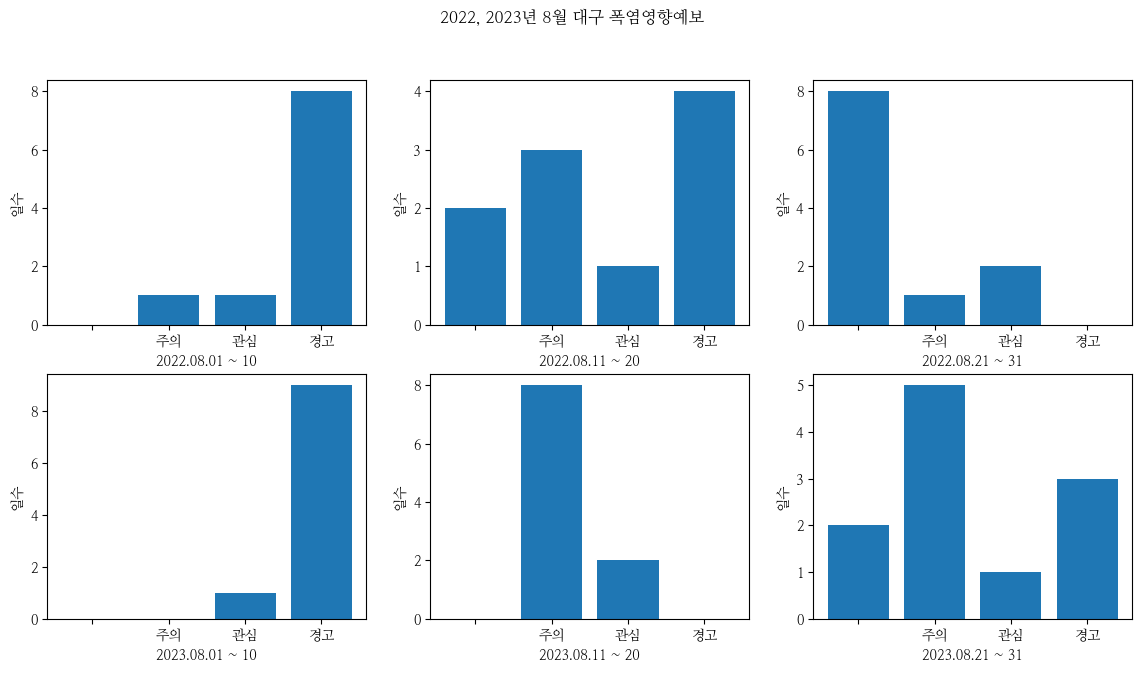

In [343]:
label_1 = ['최고체감온도(°C)', '최고기온(°C)', '평균기온(°C)', '최저기온(°C)']
label_2 = ['폭염여부(O/X)', '열대야(O/X)']

range_label = ['2022.08.01 ~ 10', '2022.08.11 ~ 20', '2022.08.21 ~ 31',
               '2023.08.01 ~ 10', '2023.08.11 ~ 20', '2023.08.21 ~ 31']

draw_temp(range_label, label_1, deagu_df, deagu_date_df)
draw_TF(range_label, label_2, deagu_df, deagu_date_df)
draw_hot_step(range_label, deagu_df, deagu_date_df)

- 대구의 8월 기온 데이터를 보면 8춸 초반에는 30도를 넘는 기온를 보이다가 말쯤으로 갈때 기온이 내려감.
- 폭염여부를 보면 8월 초에는 폭염과 열대야인 날이 더 많지만 8월 중후반으로 갈수록 아닌 날이 더 많음을 볼 수 있음.
- 8월 폭염영향예보의 빈도를 보면 위의 기온 데이터에서 최고 기온이 33도 이상을 유지하는 날이 많아 기온이 떨어지더라도 폭염영향예보가 된날이 많음.
- 
- 22년 8월, 23년 8월의 데이터로 보았을때 24년 8월은 초에는 폭염과 열대야가 예보되는 날이 많을 것이고 8월 후반에는 최고기온이 점차 낮아지면서 8월 초와 같은 더위는 없을 것으로 예상됨. 만약 진짜 8월 말에 더위가 어느 정도 가시더라도 23년도 8월 말의 폭염영향예보의 건수가 많은 관계로 야외활동은 주의를 해야함.

In [344]:
# 데이터 저거 멀티 인덱스 하는 것만 하면...
# 다른 지역도 볼 수 있음.

# 서울
seoul_df_1 = seoul_df[['일시', '폭염여부(O/X)', '최고체감온도(°C)', '최고기온(°C)', '평균기온(°C)', '최저기온(°C)', '폭염영향예보(단계)', '열대야(O/X)']]
seoul_df_1.loc[:,'date_range'] = 0
seoul_df_1['date_range'] = seoul_df_1['date_range'].replace(0, pd.NA)
seoul_df_1.loc[0,'date_range'] = '2022.08.01 ~ 10'
seoul_df_1.loc[10, 'date_range'] = '2022.08.11 ~ 20'
seoul_df_1.loc[20, 'date_range'] = '2022.08.21 ~ 31'
seoul_df_1.loc[31, 'date_range'] = '2023.08.01 ~ 10'
seoul_df_1.loc[41, 'date_range'] = '2023.08.11 ~ 20'
seoul_df_1.loc[51, 'date_range'] = '2023.08.21 ~ 31'
seoul_df_1['date_range'] = seoul_df_1['date_range'].ffill()
seoul_date_df = seoul_df_1.set_index(['date_range', '일시'])
seoul_date_df

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9856\60485544.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_df_1.loc[:,'date_range'] = 0
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9856\60485544.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_df_1['date_range'] = seoul_df_1['date_range'].replace(0, pd.NA)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9856\60485544.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

폭염여부(O/X)  최고체감온도(°C)  최고기온(°C)  평균기온(°C)  최저기온(°C)  \
date_range      일시                                                              
2022.08.01 ~ 10 2022.8.1          O        33.8      32.4      28.6      25.4   
                2022.8.2          X        30.6      28.5      26.8      25.5   
                2022.8.3          X        32.0      30.0      27.1      25.2   
                2022.8.4          O        33.9      32.9      28.9      26.0   
                2022.8.5          O        33.6      32.7      29.4      27.0   
...                             ...         ...       ...       ...       ...   
2023.08.21 ~ 31 2023.8.27         X        30.6      29.6      26.1      22.7   
                2023.8.28         X        27.4      25.6      22.7      20.8   
                2023.8.29         X        28.3      25.5      23.9      22.5   
                2023.8.30         X        26.6      24.5      22.8      21.5   
                2023.8.31         X        28.7      28.9      23.9      21.0   

                          폭염영향예보(단계) 열대야(O/X)  
date_range      일시                             
2022.08.01 ~ 10 2022.8.1          관심        O  
                2022.8.2          관심        O  
                2022.8.3          관심        O  
                2022.8.4          관심        O  
                2022.8.5          주의        O  
...                              ...      ...  
2023.08.21 ~ 31 2023.8.27         관심        X  
                2023.8.28                   X  
                2023.8.29                   X  
                2023.8.30                   X  
                2023.8.31                   X  

[62 rows x 7 columns]

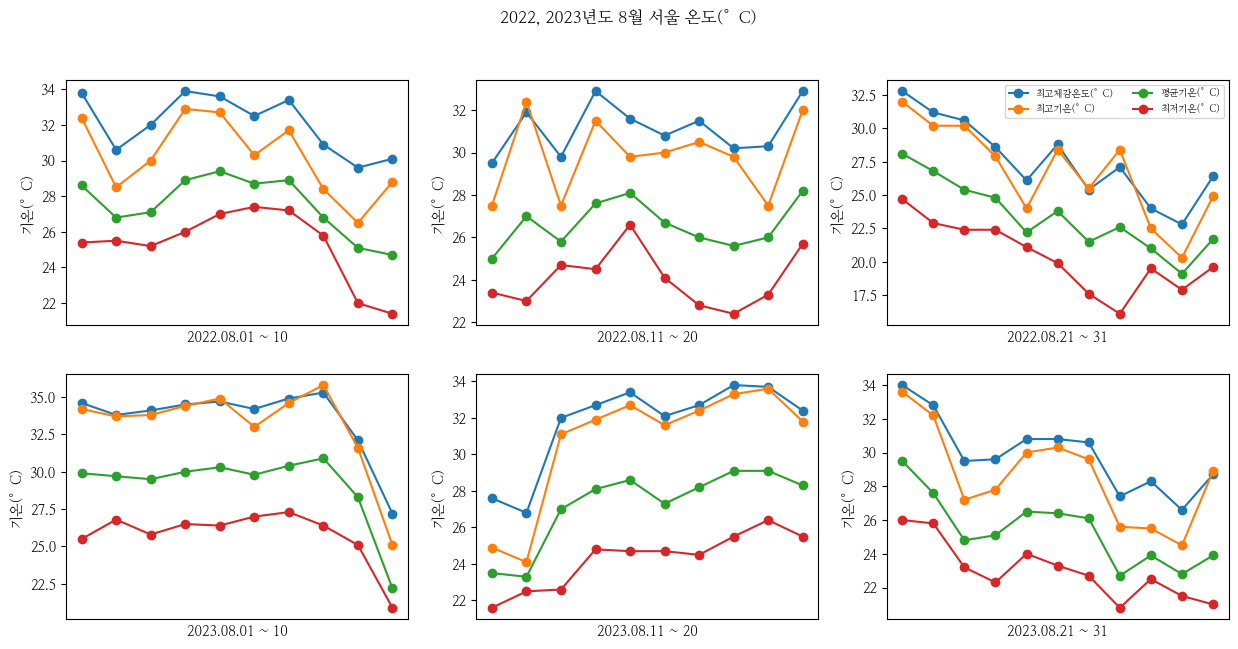

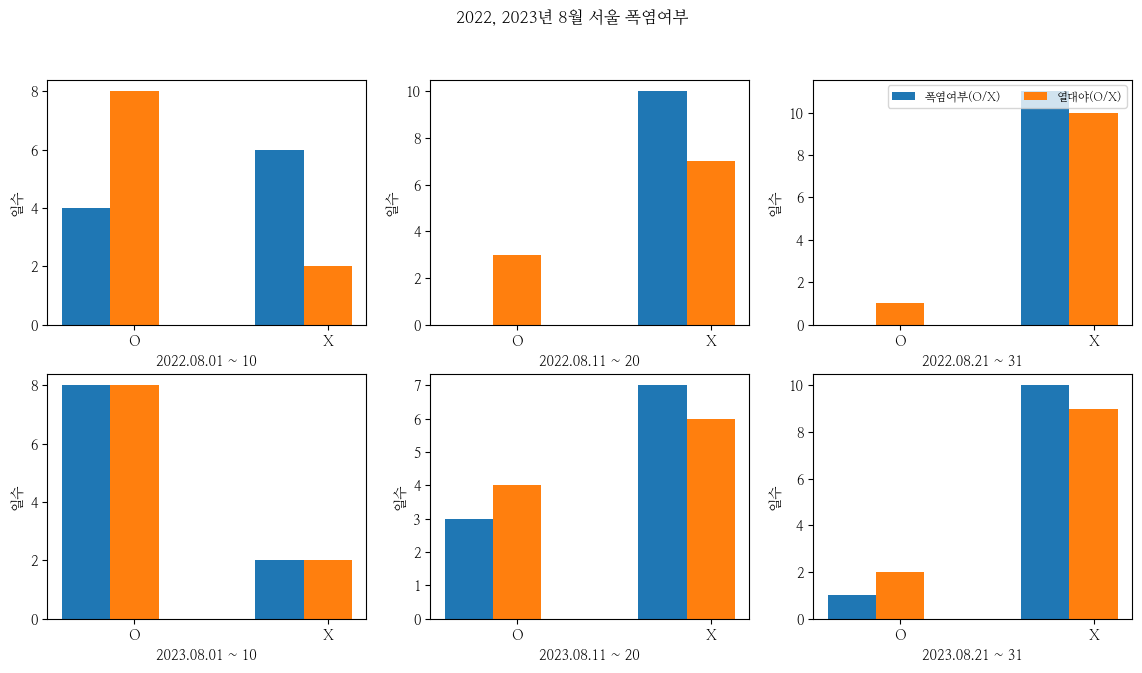

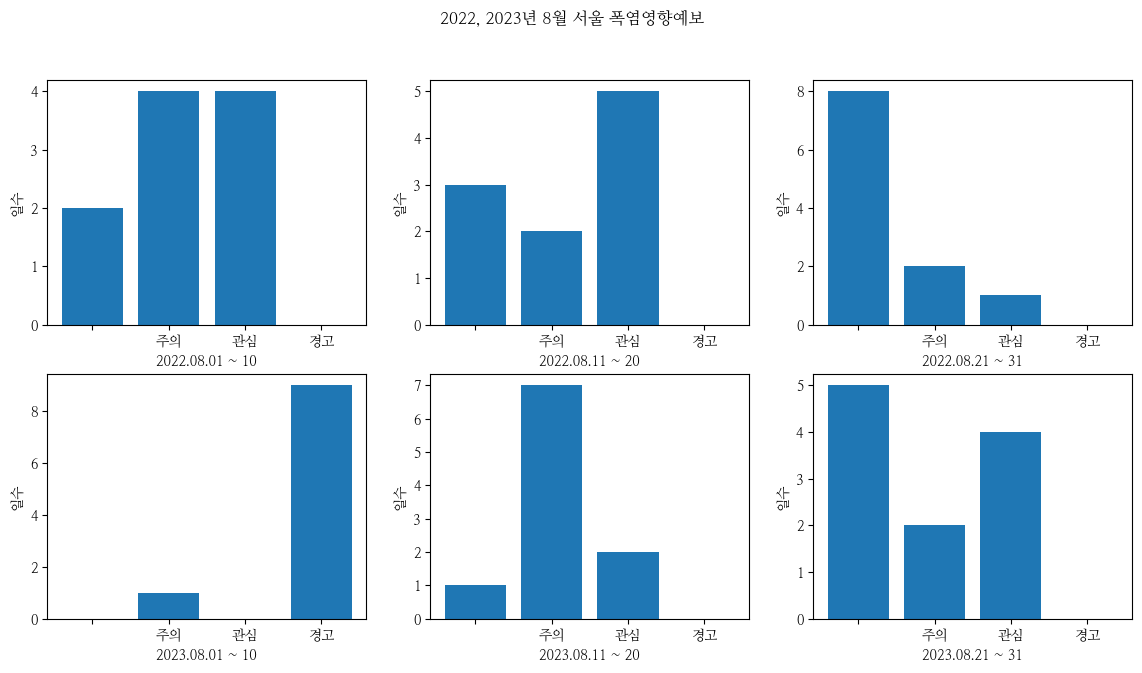

In [346]:
# 서울 폭염 그래프
draw_temp(range_label, label_1, seoul_df, seoul_date_df)
draw_TF(range_label, label_2, seoul_df, seoul_date_df)
draw_hot_step(range_label, seoul_df, seoul_date_df)

In [347]:
# 인천
incheon_df_1 = incheon_df[['일시', '폭염여부(O/X)', '최고체감온도(°C)', '최고기온(°C)', '평균기온(°C)', '최저기온(°C)', '폭염영향예보(단계)', '열대야(O/X)']]
incheon_df_1.loc[:,'date_range'] = 0
incheon_df_1['date_range'] = incheon_df_1['date_range'].replace(0, pd.NA)
incheon_df_1.loc[0,'date_range'] = '2022.08.01 ~ 10'
incheon_df_1.loc[10, 'date_range'] = '2022.08.11 ~ 20'
incheon_df_1.loc[20, 'date_range'] = '2022.08.21 ~ 31'
incheon_df_1.loc[31, 'date_range'] = '2023.08.01 ~ 10'
incheon_df_1.loc[41, 'date_range'] = '2023.08.11 ~ 20'
incheon_df_1.loc[51, 'date_range'] = '2023.08.21 ~ 31'
incheon_df_1['date_range'] = incheon_df_1['date_range'].ffill()
incheon_date_df = incheon_df_1.set_index(['date_range', '일시'])
incheon_date_df

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9856\2520624019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incheon_df_1.loc[:,'date_range'] = 0
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9856\2520624019.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incheon_df_1['date_range'] = incheon_df_1['date_range'].replace(0, pd.NA)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9856\2520624019.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

폭염여부(O/X)  최고체감온도(°C)  최고기온(°C)  평균기온(°C)  최저기온(°C)  \
date_range      일시                                                              
2022.08.01 ~ 10 2022.8.1          X        32.8      31.3      27.7      24.9   
                2022.8.2          X        29.2      26.3      25.5      24.5   
                2022.8.3          X        31.0      28.1      26.3      24.7   
                2022.8.4          X        32.0      30.0      27.3      25.3   
                2022.8.5          X        32.1      30.0      27.8      26.3   
...                             ...         ...       ...       ...       ...   
2023.08.21 ~ 31 2023.8.27         X        29.9      28.4      25.6      23.2   
                2023.8.28         X        27.6      25.6      22.7      20.5   
                2023.8.29         X        27.6      25.5      23.4      22.2   
                2023.8.30         X        26.6      24.3      22.9      21.8   
                2023.8.31         X        28.1      26.9      23.6      21.1   

                          폭염영향예보(단계) 열대야(O/X)  
date_range      일시                             
2022.08.01 ~ 10 2022.8.1          관심        O  
                2022.8.2          관심        X  
                2022.8.3          관심        O  
                2022.8.4          관심        O  
                2022.8.5          주의        O  
...                              ...      ...  
2023.08.21 ~ 31 2023.8.27                   X  
                2023.8.28                   X  
                2023.8.29                   X  
                2023.8.30                   X  
                2023.8.31                   X  

[62 rows x 7 columns]

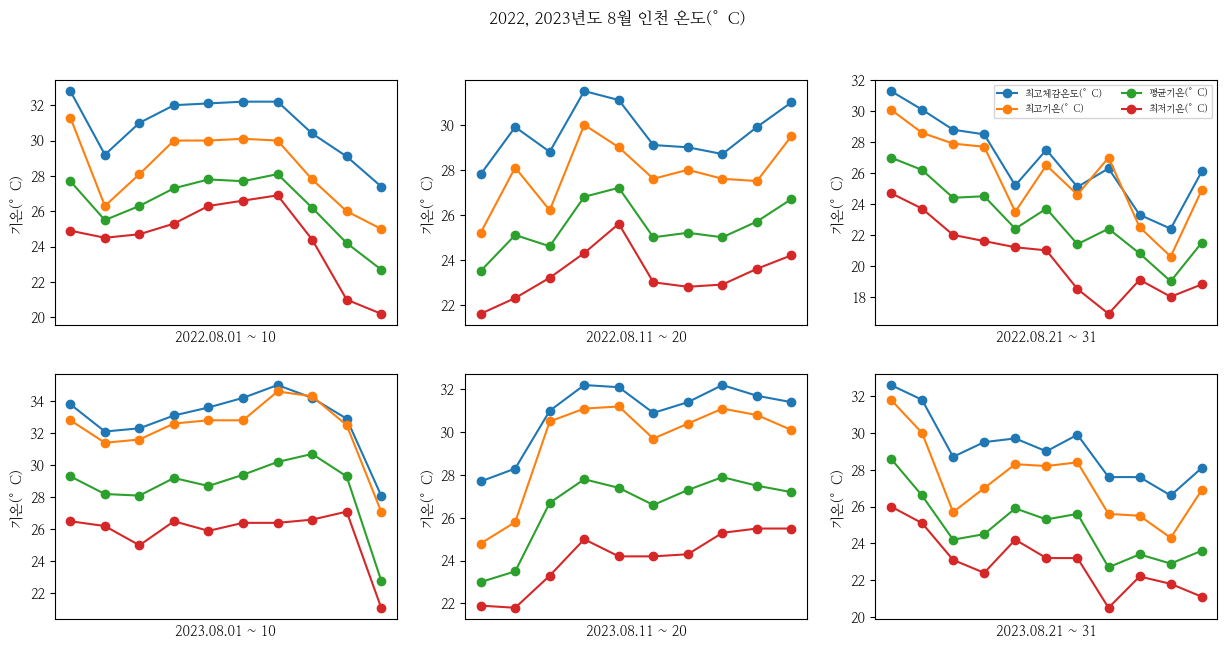

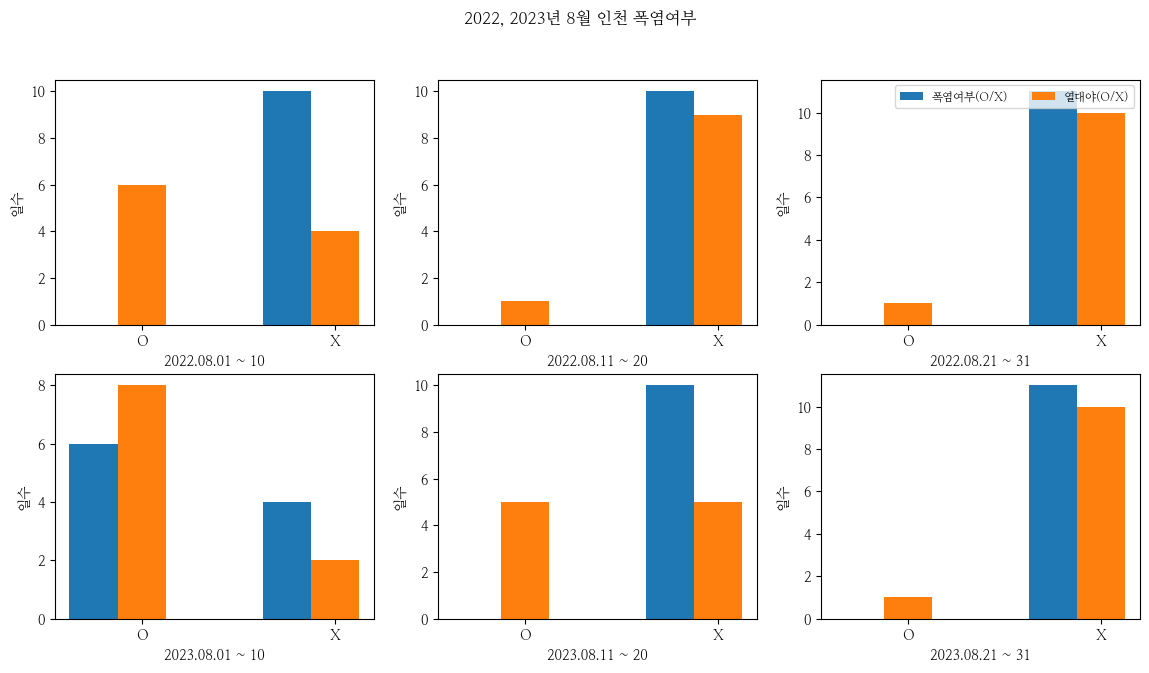

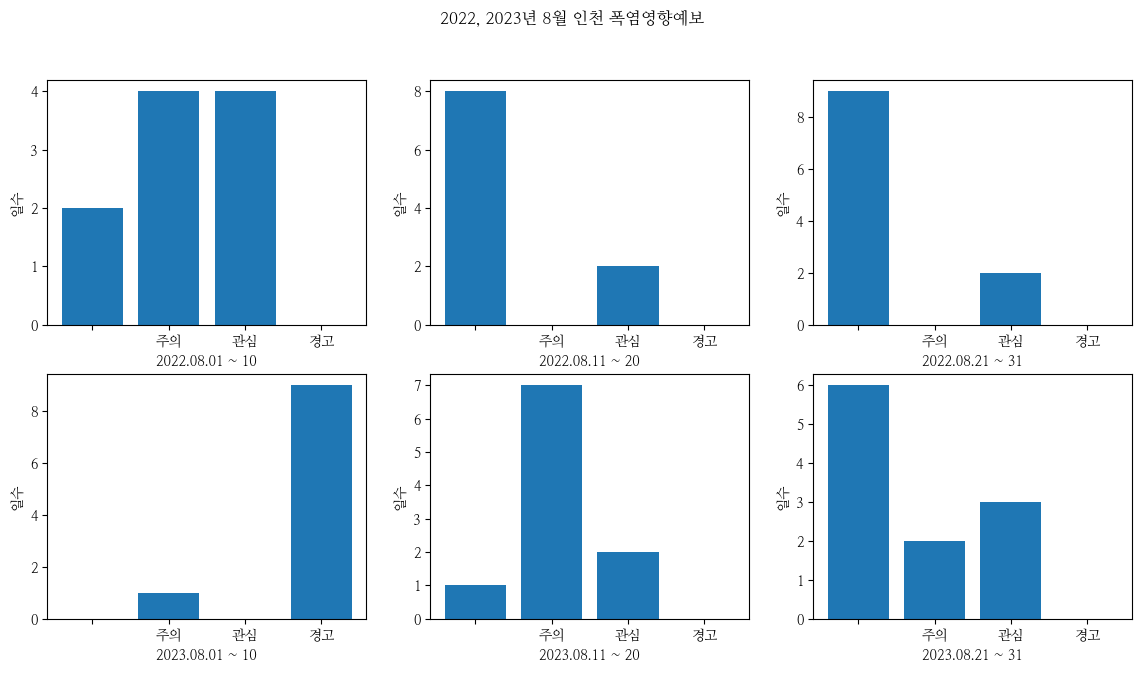

In [348]:
# 그래프
draw_temp(range_label, label_1, incheon_df, incheon_date_df)
draw_TF(range_label, label_2, incheon_df, incheon_date_df)
draw_hot_step(range_label, incheon_df, incheon_date_df)

In [349]:
# 대전
deajeon_df_1 = deajeon_df[['일시', '폭염여부(O/X)', '최고체감온도(°C)', '최고기온(°C)', '평균기온(°C)', '최저기온(°C)', '폭염영향예보(단계)', '열대야(O/X)']]
deajeon_df_1.loc[:,'date_range'] = 0
deajeon_df_1['date_range'] = deajeon_df_1['date_range'].replace(0, pd.NA)
deajeon_df_1.loc[0,'date_range'] = '2022.08.01 ~ 10'
deajeon_df_1.loc[10, 'date_range'] = '2022.08.11 ~ 20'
deajeon_df_1.loc[20, 'date_range'] = '2022.08.21 ~ 31'
deajeon_df_1.loc[31, 'date_range'] = '2023.08.01 ~ 10'
deajeon_df_1.loc[41, 'date_range'] = '2023.08.11 ~ 20'
deajeon_df_1.loc[51, 'date_range'] = '2023.08.21 ~ 31'
deajeon_df_1['date_range'] = deajeon_df_1['date_range'].ffill()
deajeon_date_df = deajeon_df_1.set_index(['date_range', '일시'])
deagu_date_df

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9856\2198784045.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deajeon_df_1.loc[:,'date_range'] = 0
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9856\2198784045.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deajeon_df_1['date_range'] = deajeon_df_1['date_range'].replace(0, pd.NA)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9856\2198784045.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

폭염여부(O/X)  최고체감온도(°C)  최고기온(°C)  평균기온(°C)  최저기온(°C)  \
date_range      일시                                                              
2022.08.01 ~ 10 2022.8.1          X        32.4      31.2      29.4      26.8   
                2022.8.2          O        34.0      32.6      27.9      25.7   
                2022.8.3          O        36.6      37.1      30.6      26.3   
                2022.8.4          O        35.5      35.3      30.7      27.4   
                2022.8.5          O        35.6      35.2      30.8      26.5   
...                             ...         ...       ...       ...       ...   
2023.08.21 ~ 31 2023.8.27         X        30.9      30.9      25.5      22.3   
                2023.8.28         X        29.5      27.9      25.5      23.0   
                2023.8.29         X        29.9      28.0      25.7      23.2   
                2023.8.30         X        28.7      25.9      24.7      22.3   
                2023.8.31         X        27.6      25.7      23.3      21.2   

                          폭염영향예보(단계) 열대야(O/X)  
date_range      일시                             
2022.08.01 ~ 10 2022.8.1          관심        O  
                2022.8.2          주의        O  
                2022.8.3          경고        O  
                2022.8.4          경고        O  
                2022.8.5          경고        O  
...                              ...      ...  
2023.08.21 ~ 31 2023.8.27         주의        X  
                2023.8.28         주의        X  
                2023.8.29         주의        X  
                2023.8.30                   X  
                2023.8.31                   X  

[62 rows x 7 columns]

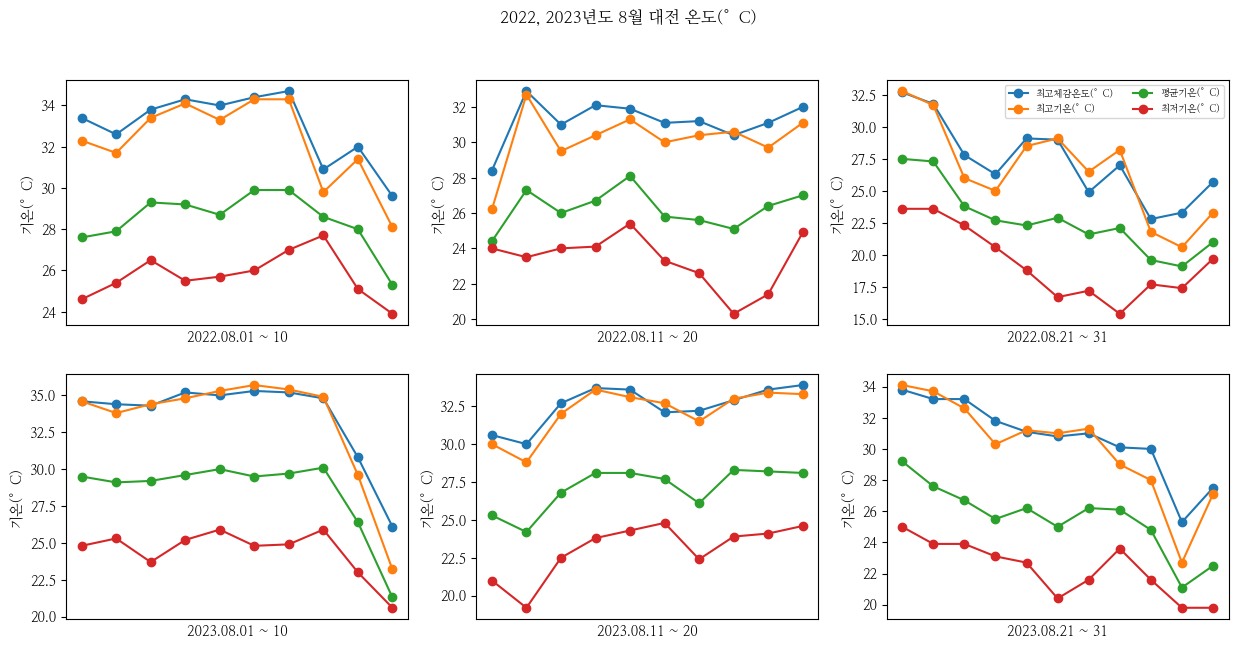

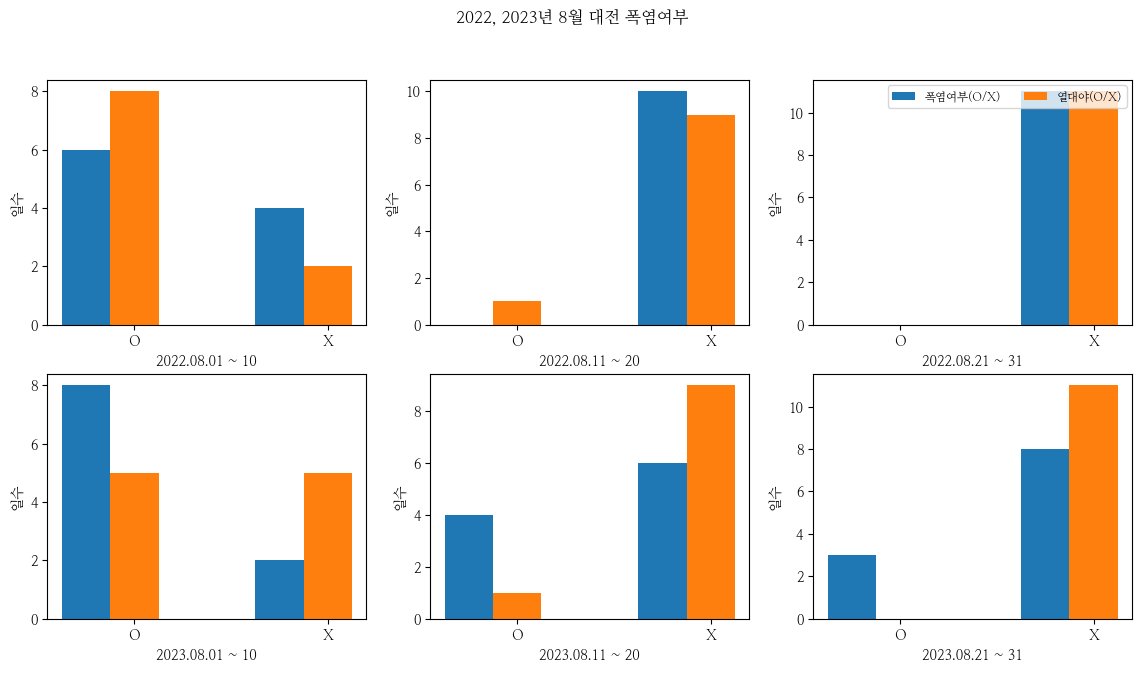

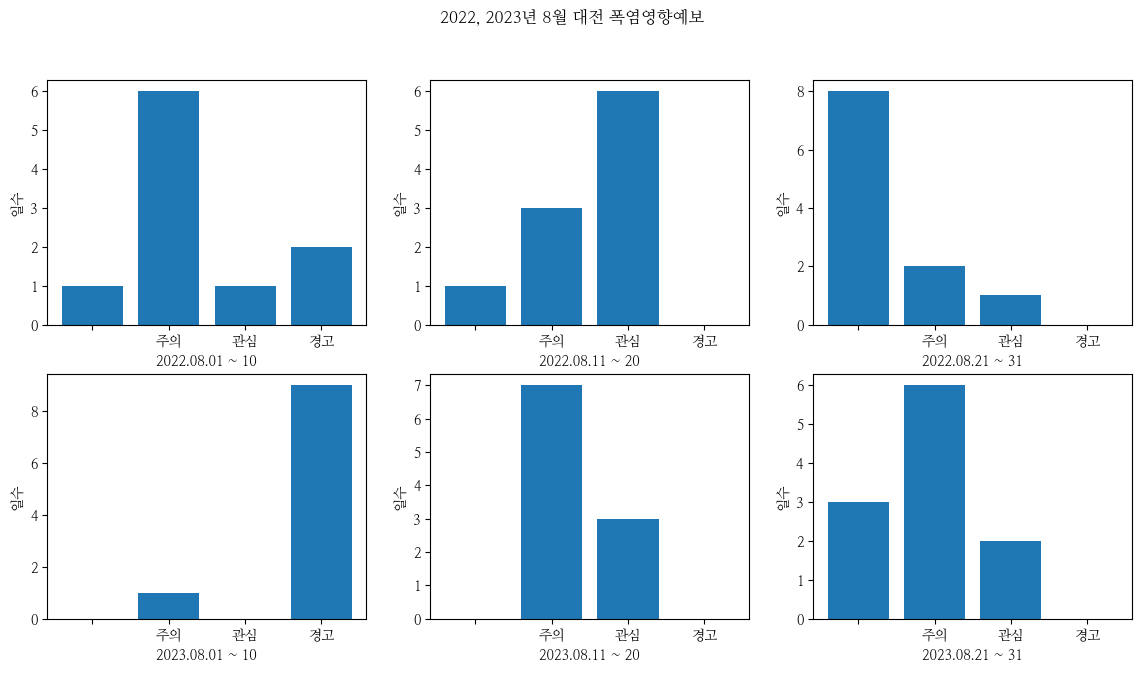

In [350]:
# 그래프
draw_temp(range_label, label_1, deajeon_df, deajeon_date_df)
draw_TF(range_label, label_2, deajeon_df, deajeon_date_df)
draw_hot_step(range_label, deajeon_df, deajeon_date_df)

In [351]:
# 광주
gwangju_df_1 = gwangju_df[['일시', '폭염여부(O/X)', '최고체감온도(°C)', '최고기온(°C)', '평균기온(°C)', '최저기온(°C)', '폭염영향예보(단계)', '열대야(O/X)']]
gwangju_df_1.loc[:,'date_range'] = 0
gwangju_df_1['date_range'] = gwangju_df_1['date_range'].replace(0, pd.NA)
gwangju_df_1.loc[0,'date_range'] = '2022.08.01 ~ 10'
gwangju_df_1.loc[10, 'date_range'] = '2022.08.11 ~ 20'
gwangju_df_1.loc[20, 'date_range'] = '2022.08.21 ~ 31'
gwangju_df_1.loc[31, 'date_range'] = '2023.08.01 ~ 10'
gwangju_df_1.loc[41, 'date_range'] = '2023.08.11 ~ 20'
gwangju_df_1.loc[51, 'date_range'] = '2023.08.21 ~ 31'
gwangju_df_1['date_range'] = gwangju_df_1['date_range'].ffill()
gwangju_date_df = gwangju_df_1.set_index(['date_range', '일시'])
gwangju_date_df

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9856\3998950893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwangju_df_1.loc[:,'date_range'] = 0
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9856\3998950893.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwangju_df_1['date_range'] = gwangju_df_1['date_range'].replace(0, pd.NA)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9856\3998950893.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

폭염여부(O/X)  최고체감온도(°C)  최고기온(°C)  평균기온(°C)  최저기온(°C)  \
date_range      일시                                                              
2022.08.01 ~ 10 2022.8.1          O        33.1      30.0      27.6      25.5   
                2022.8.2          O        34.0      31.4      28.0      25.4   
                2022.8.3          O        34.8      31.4      27.9      25.6   
                2022.8.4          O        35.1      33.3      29.0      26.3   
                2022.8.5          O        35.0      32.5      29.0      26.6   
...                             ...         ...       ...       ...       ...   
2023.08.21 ~ 31 2023.8.27         O        33.3      32.2      27.0      22.6   
                2023.8.28         X        32.7      30.3      26.9      24.3   
                2023.8.29         X        32.4      28.9      25.5      23.1   
                2023.8.30         X        26.8      23.6      21.9      19.8   
                2023.8.31         X        30.4      28.9      23.6      19.9   

                          폭염영향예보(단계) 열대야(O/X)  
date_range      일시                             
2022.08.01 ~ 10 2022.8.1          관심        O  
                2022.8.2          주의        O  
                2022.8.3          주의        O  
                2022.8.4          경고        O  
                2022.8.5          경고        O  
...                              ...      ...  
2023.08.21 ~ 31 2023.8.27         주의        X  
                2023.8.28         주의        X  
                2023.8.29         관심        X  
                2023.8.30                   X  
                2023.8.31                   X  

[62 rows x 7 columns]

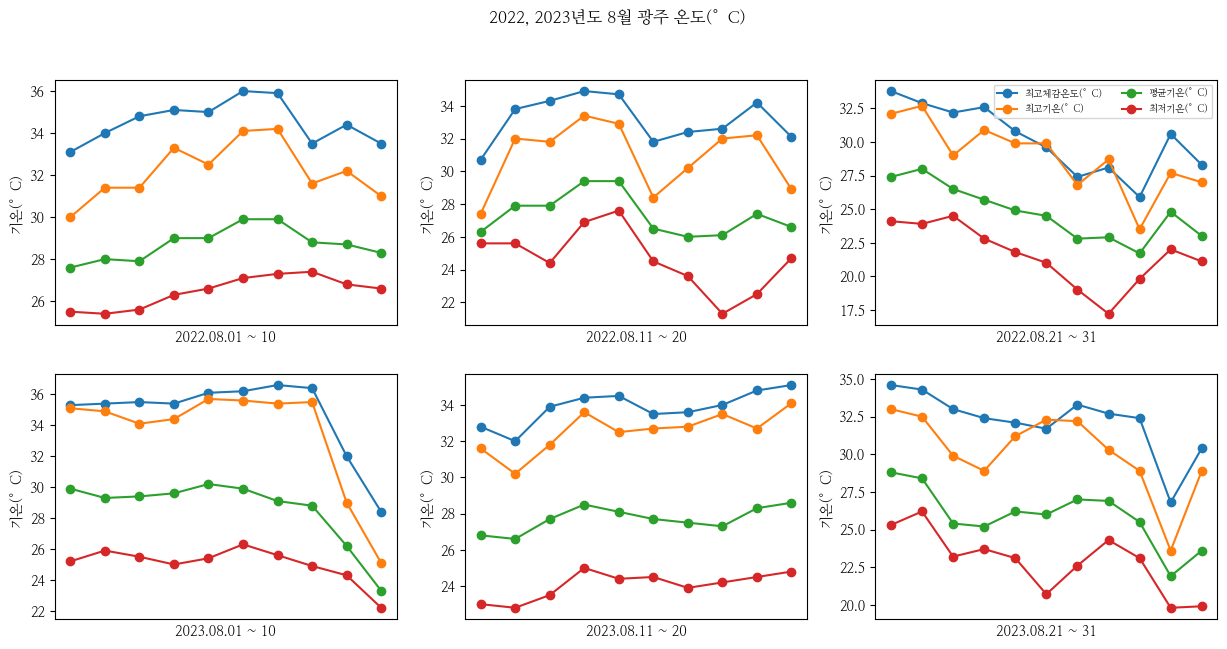

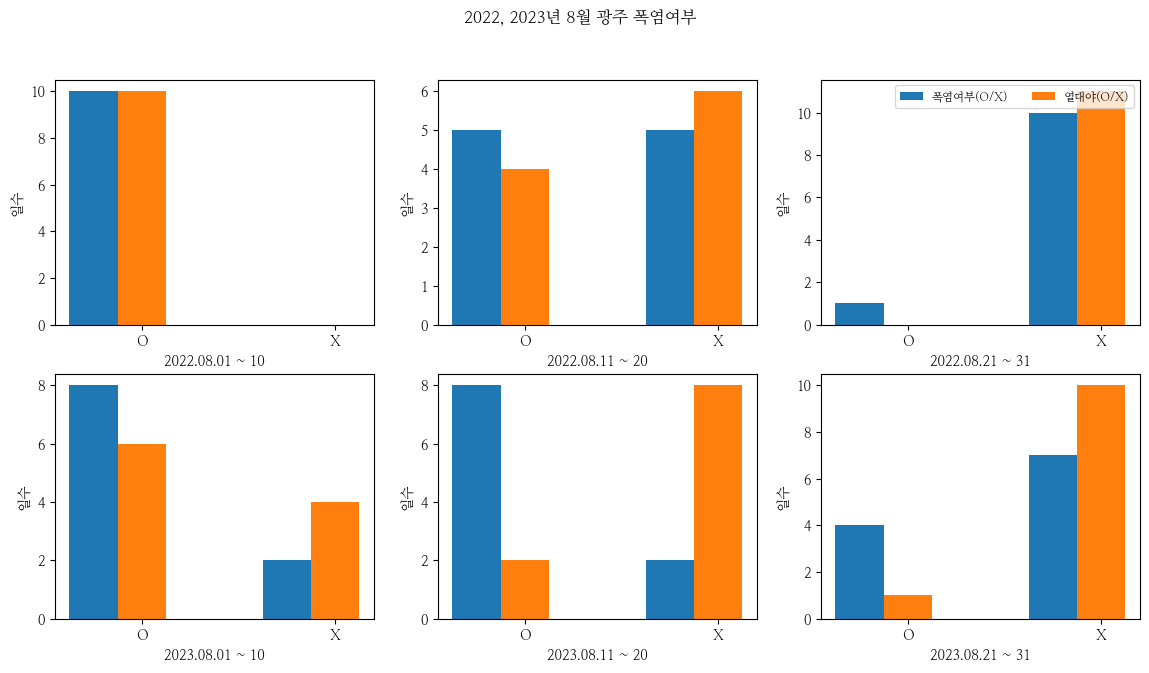

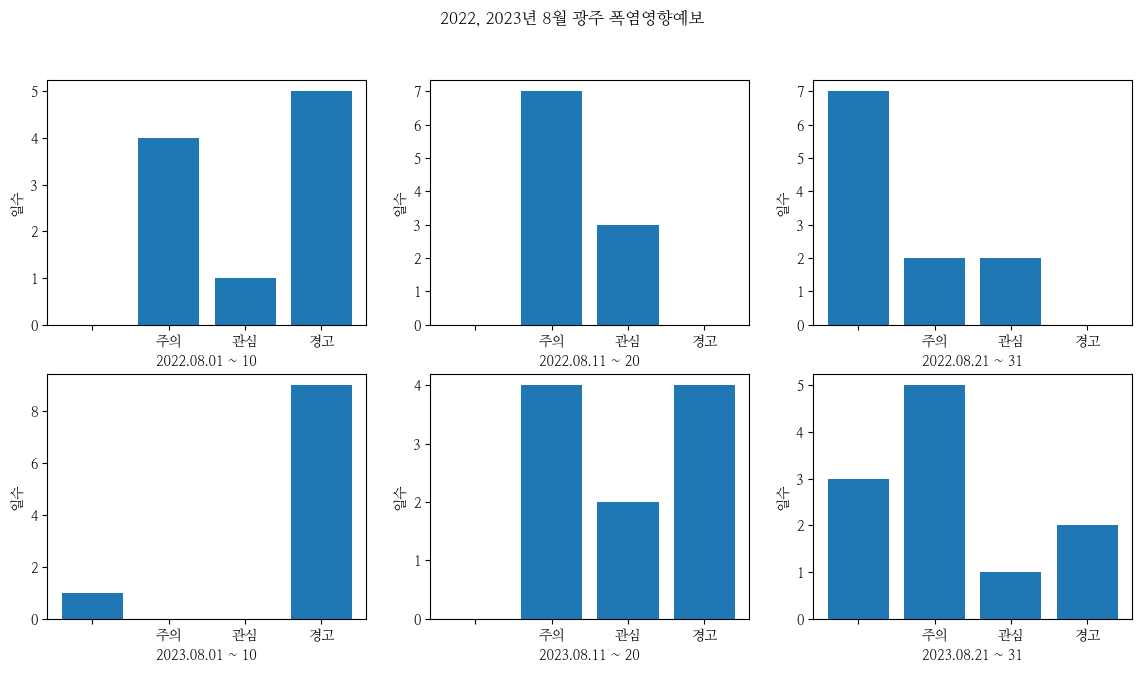

In [352]:
# 그래프
draw_temp(range_label, label_1, gwangju_df, gwangju_date_df)
draw_TF(range_label, label_2, gwangju_df, gwangju_date_df)
draw_hot_step(range_label, gwangju_df, gwangju_date_df)

In [353]:
# 부산
busan_df_1 = busan_df[['일시', '폭염여부(O/X)', '최고체감온도(°C)', '최고기온(°C)', '평균기온(°C)', '최저기온(°C)', '폭염영향예보(단계)', '열대야(O/X)']]
busan_df_1.loc[:,'date_range'] = 0
busan_df_1['date_range'] = busan_df_1['date_range'].replace(0, pd.NA)
busan_df_1.loc[0,'date_range'] = '2022.08.01 ~ 10'
busan_df_1.loc[10, 'date_range'] = '2022.08.11 ~ 20'
busan_df_1.loc[20, 'date_range'] = '2022.08.21 ~ 31'
busan_df_1.loc[31, 'date_range'] = '2023.08.01 ~ 10'
busan_df_1.loc[41, 'date_range'] = '2023.08.11 ~ 20'
busan_df_1.loc[51, 'date_range'] = '2023.08.21 ~ 31'
busan_df_1['date_range'] = busan_df_1['date_range'].ffill()
busan_date_df = busan_df_1.set_index(['date_range', '일시'])
busan_date_df

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9856\282600390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  busan_df_1.loc[:,'date_range'] = 0
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9856\282600390.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  busan_df_1['date_range'] = busan_df_1['date_range'].replace(0, pd.NA)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9856\282600390.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

폭염여부(O/X)  최고체감온도(°C)  최고기온(°C)  평균기온(°C)  최저기온(°C)  \
date_range      일시                                                              
2022.08.01 ~ 10 2022.8.1          X        32.3      30.5      27.5      26.2   
                2022.8.2          X        31.8      29.4      27.1      26.0   
                2022.8.3          X        32.5      30.4      27.7      25.4   
                2022.8.4          O        33.2      31.8      28.7      26.2   
                2022.8.5          O        34.2      33.1      29.0      26.6   
...                             ...         ...       ...       ...       ...   
2023.08.21 ~ 31 2023.8.27         X        32.2      32.0      27.5      24.7   
                2023.8.28         X        31.9      31.3      27.4      25.0   
                2023.8.29         X        30.3      29.1      27.0      25.2   
                2023.8.30         X        30.2      28.3      27.2      24.8   
                2023.8.31         X        31.4      30.5      26.6      24.5   

                          폭염영향예보(단계) 열대야(O/X)  
date_range      일시                             
2022.08.01 ~ 10 2022.8.1          관심        O  
                2022.8.2          주의        O  
                2022.8.3          주의        O  
                2022.8.4          주의        O  
                2022.8.5          주의        O  
...                              ...      ...  
2023.08.21 ~ 31 2023.8.27         주의        O  
                2023.8.28         주의        O  
                2023.8.29         주의        X  
                2023.8.30                   O  
                2023.8.31         관심        X  

[62 rows x 7 columns]

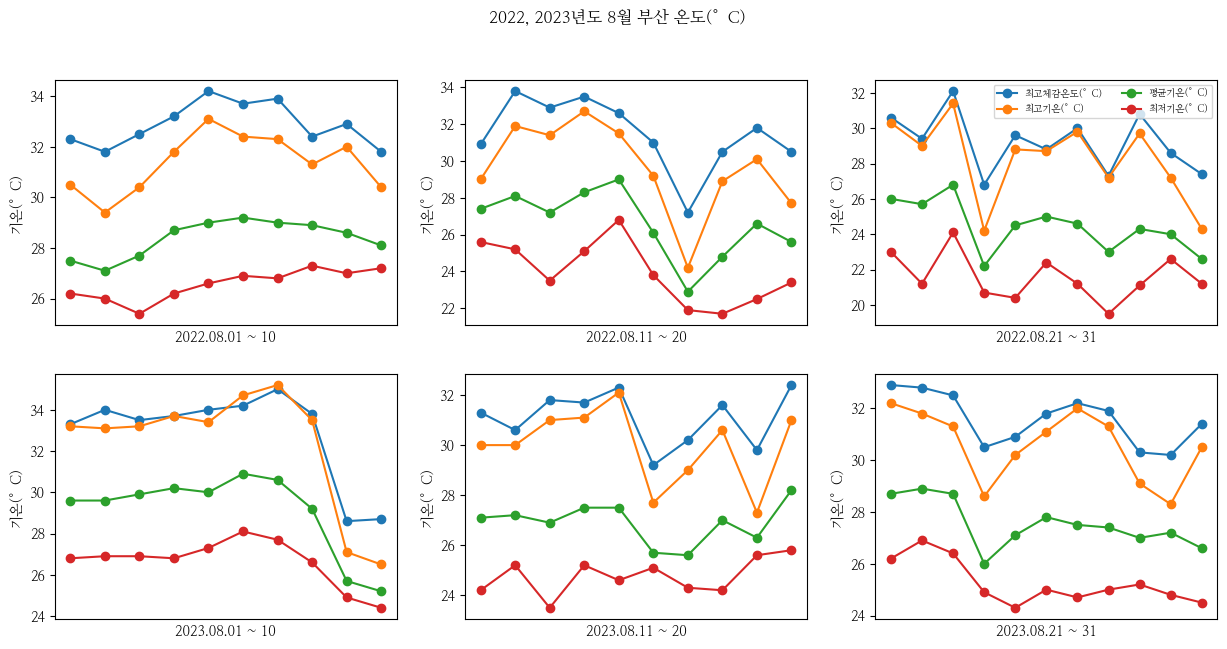

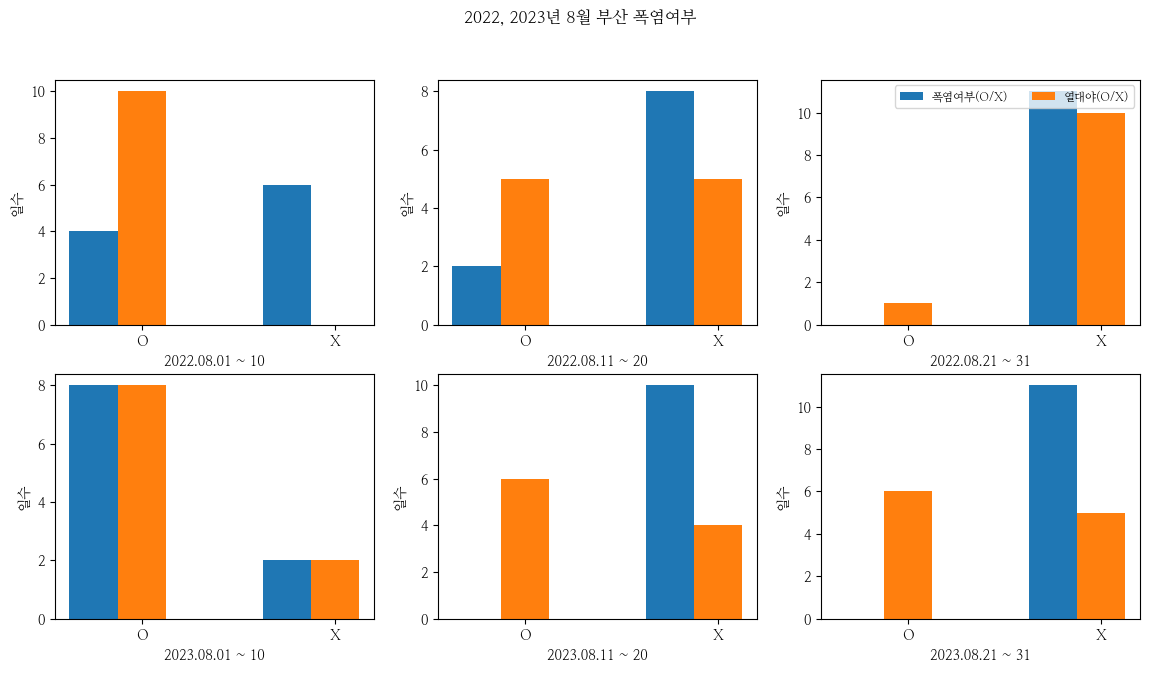

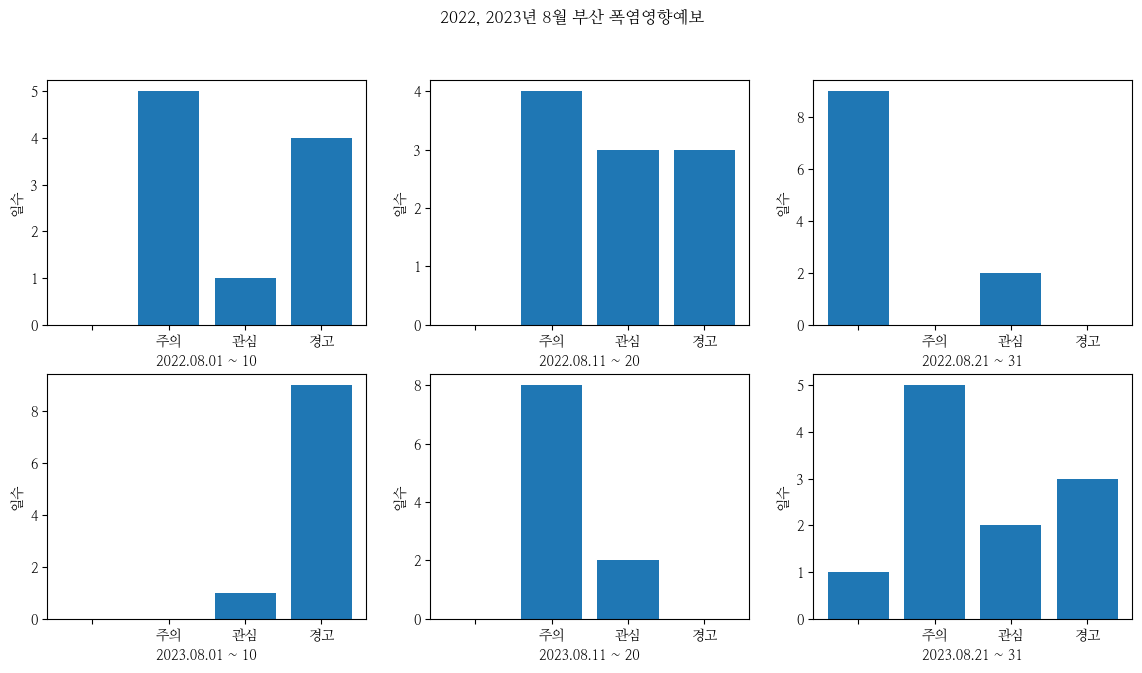

In [354]:
# 그래프
draw_temp(range_label, label_1, busan_df, busan_date_df)
draw_TF(range_label, label_2, busan_df, busan_date_df)
draw_hot_step(range_label, busan_df, busan_date_df)

In [355]:
# 울산
ulsan_df_1 = ulsan_df[['일시', '폭염여부(O/X)', '최고체감온도(°C)', '최고기온(°C)', '평균기온(°C)', '최저기온(°C)', '폭염영향예보(단계)', '열대야(O/X)']]
ulsan_df_1.loc[:,'date_range'] = 0
ulsan_df_1['date_range'] = ulsan_df_1['date_range'].replace(0, pd.NA)
ulsan_df_1.loc[0,'date_range'] = '2022.08.01 ~ 10'
ulsan_df_1.loc[10, 'date_range'] = '2022.08.11 ~ 20'
ulsan_df_1.loc[20, 'date_range'] = '2022.08.21 ~ 31'
ulsan_df_1.loc[31, 'date_range'] = '2023.08.01 ~ 10'
ulsan_df_1.loc[41, 'date_range'] = '2023.08.11 ~ 20'
ulsan_df_1.loc[51, 'date_range'] = '2023.08.21 ~ 31'
ulsan_df_1['date_range'] = ulsan_df_1['date_range'].ffill()
ulsan_date_df = ulsan_df_1.set_index(['date_range', '일시'])
ulsan_date_df

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9856\3243312708.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ulsan_df_1.loc[:,'date_range'] = 0
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9856\3243312708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ulsan_df_1['date_range'] = ulsan_df_1['date_range'].replace(0, pd.NA)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9856\3243312708.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

폭염여부(O/X)  최고체감온도(°C)  최고기온(°C)  평균기온(°C)  최저기온(°C)  \
date_range      일시                                                              
2022.08.01 ~ 10 2022.8.1          X        32.4      30.7      28.4      26.6   
                2022.8.2          X        32.3      30.4      28.4      26.8   
                2022.8.3          O        34.2      34.0      29.4      26.0   
                2022.8.4          O        33.9      34.1      30.0      26.2   
                2022.8.5          O        34.1      34.0      29.8      25.8   
...                             ...         ...       ...       ...       ...   
2023.08.21 ~ 31 2023.8.27         X        30.3      29.0      25.5      21.5   
                2023.8.28         X        29.1      27.4      25.1      23.2   
                2023.8.29         X        30.7      29.5      26.3      24.7   
                2023.8.30         X        30.9      29.2      26.5      24.6   
                2023.8.31         X        31.2      29.9      25.2      22.8   

                          폭염영향예보(단계) 열대야(O/X)  
date_range      일시                             
2022.08.01 ~ 10 2022.8.1          관심        O  
                2022.8.2          관심        O  
                2022.8.3          주의        O  
                2022.8.4          주의        O  
                2022.8.5          경고        O  
...                              ...      ...  
2023.08.21 ~ 31 2023.8.27                   X  
                2023.8.28         관심        X  
                2023.8.29         관심        X  
                2023.8.30                   X  
                2023.8.31                   X  

[62 rows x 7 columns]

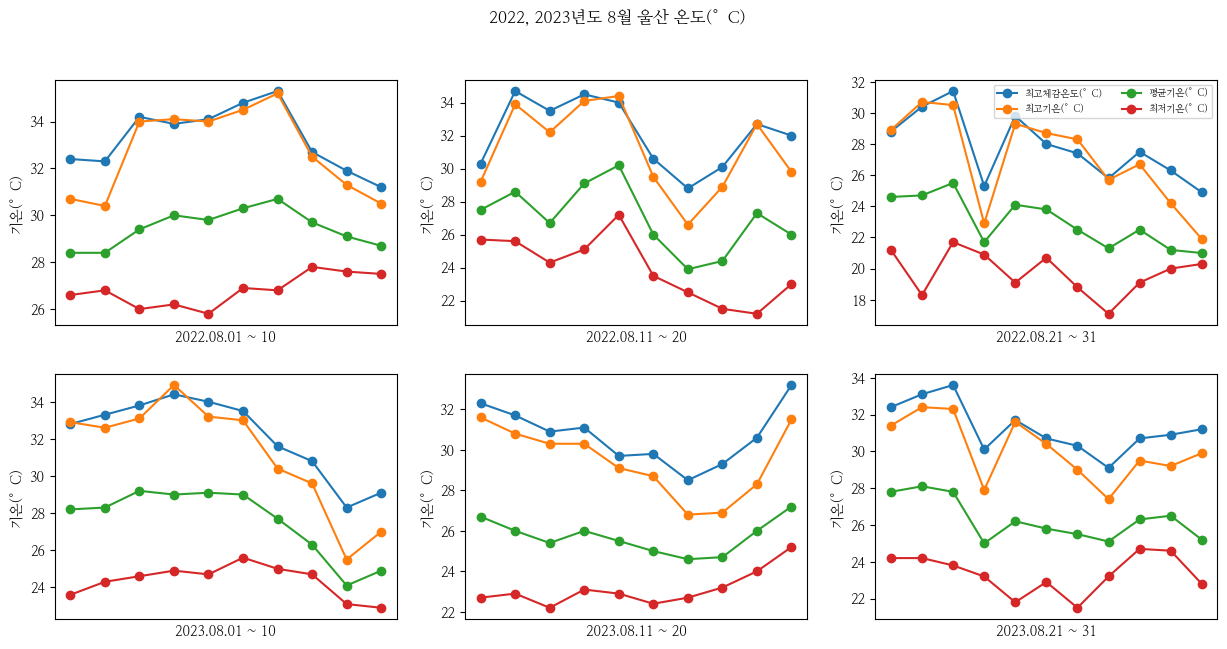

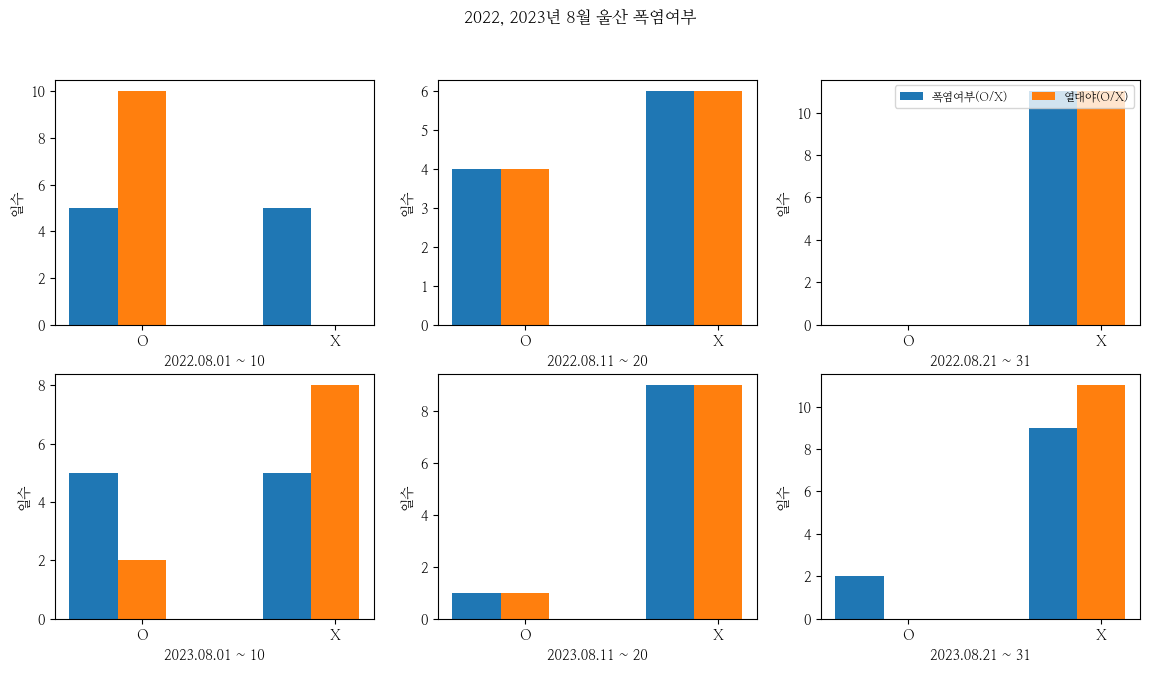

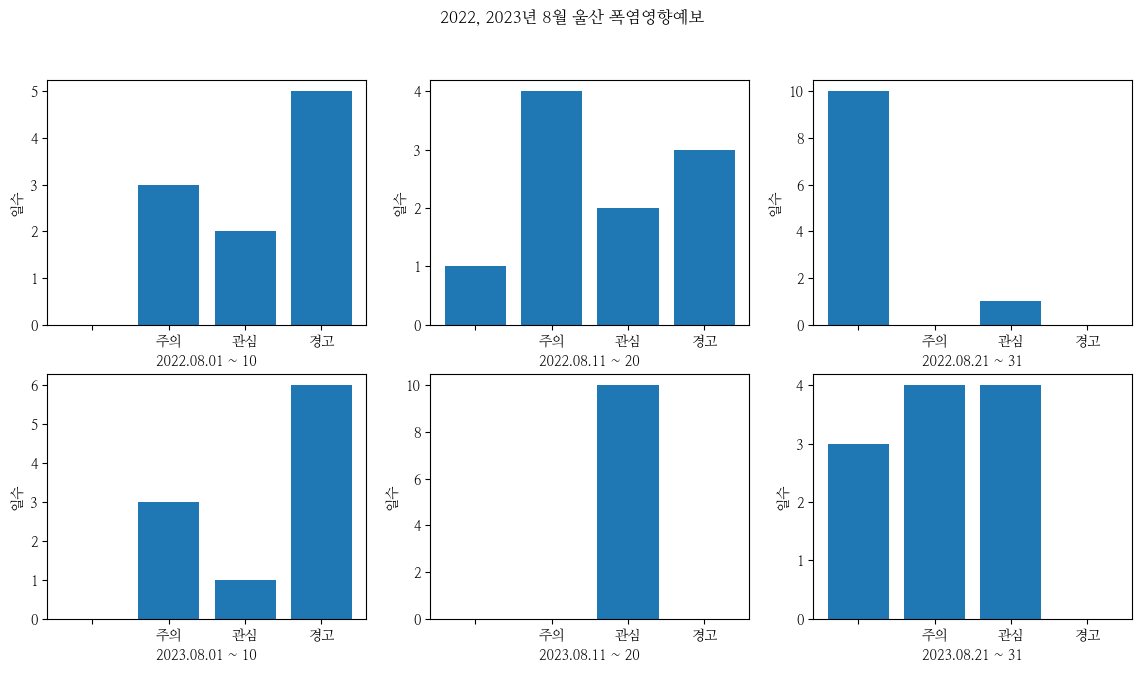

In [356]:
# 그래프
draw_temp(range_label, label_1, ulsan_df, ulsan_date_df)
draw_TF(range_label, label_2, ulsan_df, ulsan_date_df)
draw_hot_step(range_label, ulsan_df, ulsan_date_df)